In [1]:
import os
import matplotlib.pyplot as plt

path = 'C:/Users/MaxBo/OneDrive/Documents/Class MQE/Capstone/Data Files/EnvironmentalFinalized'

os.chdir(path)

In [2]:
import pandas as pd

#Import environmental data and health data
environmental = pd.read_csv('EnvironmentalFinalized4.csv')

health = pd.read_csv('publichealth_walksheds (1).csv')


In [3]:
import geopandas as gpd

#import datasets with geospatial information regarding parks and walksheds

path = 'C:/Users/MaxBo/OneDrive/Documents/Class MQE/Capstone/Data Files/Filtered Park Data Finalized'

os.chdir(path)

parks = gpd.read_file("filtered_parks_fix2.geojson")
walkshed = gpd.read_file("Walkshed differences.geojson")

In [4]:
#Extract ID and geometry for merge

parks = parks[['objectid','geometry']]

walksheds = walkshed[['SiteID','geometry']]

In [5]:
#drop z scores

park_columns = ["objectid","updatepknm","Tree_Canopy_Park","Pollution_Park","Sewershed_Park",
                "Tree_Canopy_Walkshed","Pollution_Walkshed","Sewershed_Walkshed","percent_rank1","percent_rank2"]

environmental = environmental[park_columns]

In [6]:
#look at columns

environmental.columns

Index(['objectid', 'updatepknm', 'Tree_Canopy_Park', 'Pollution_Park',
       'Sewershed_Park', 'Tree_Canopy_Walkshed', 'Pollution_Walkshed',
       'Sewershed_Walkshed', 'percent_rank1', 'percent_rank2'],
      dtype='object')

In [7]:
#Split environmental into park and walkshed data

#drop z scores

park_columns = ["objectid","updatepknm","Tree_Canopy_Park","Pollution_Park","Sewershed_Park",
                "percent_rank1","percent_rank2"]

environmental_parks = environmental[park_columns]

In [8]:
#Split environmental into park and walkshed data

walkshed_columns = ["objectid","updatepknm","Tree_Canopy_Walkshed","Pollution_Walkshed","Sewershed_Walkshed"]

environmental_walksheds = environmental[walkshed_columns]

In [9]:
#Merge geospatial back into dataset

environmental_parks = parks.merge(environmental_parks, on="objectid")

In [10]:
#Merge geospatial back into dataset

walksheds.rename(columns={'SiteID': 'objectid'}, inplace=True)

environmental_walksheds = walksheds.merge(environmental_walksheds, on="objectid")

C:\Users\MaxBo\AppData\Local\Temp/ipykernel_35920/766595961.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  walksheds.rename(columns={'SiteID': 'objectid'}, inplace=True)


In [11]:
#Check type, should be geodataframe

type(environmental_parks)

geopandas.geodataframe.GeoDataFrame

In [12]:
environmental_walksheds

,objectid,geometry,updatepknm,Tree_Canopy_Walkshed,Pollution_Walkshed,Sewershed_Walkshed
0,1,"MULTIPOLYGON (((1334292.836 401048.612, 133456...",Able Long Park,34.684211,8.227677,0.000
1,2,"MULTIPOLYGON (((1347054.857 412546.948, 134708...",Albert Turk Graham Park,15.025678,8.257231,0.000
2,200,"MULTIPOLYGON (((1342772.094 415719.96, 1343077...",Alcoa Park,6.580960,8.403010,0.099
3,4,"MULTIPOLYGON (((1343553.418 415142.68, 1343590...",Allegheny Landing Park,6.517986,8.374007,0.109
4,5,"MULTIPOLYGON (((1344634.602 414429.947, 134476...",Allegheny Riverfront Park,5.727151,8.214720,0.001
...,...,...,...,...,...,...
163,153,"MULTIPOLYGON (((1343639.436 395007.444, 134365...",Phillips Park,25.066216,7.927602,0.000
164,160,"MULTIPOLYGON (((1334931.941 424484.439, 133510...",Riverview Park,36.276082,8.720347,0.900
165,164,"MULTIPOLYGON (((1356367.315 413712.945, 135646...",Schenley Park,19.071935,8.240077,0.999
166,170,"MULTIPOLYGON (((1350681.774 405047.841, 135073...",Southside Park,21.367905,8.111917,0.793


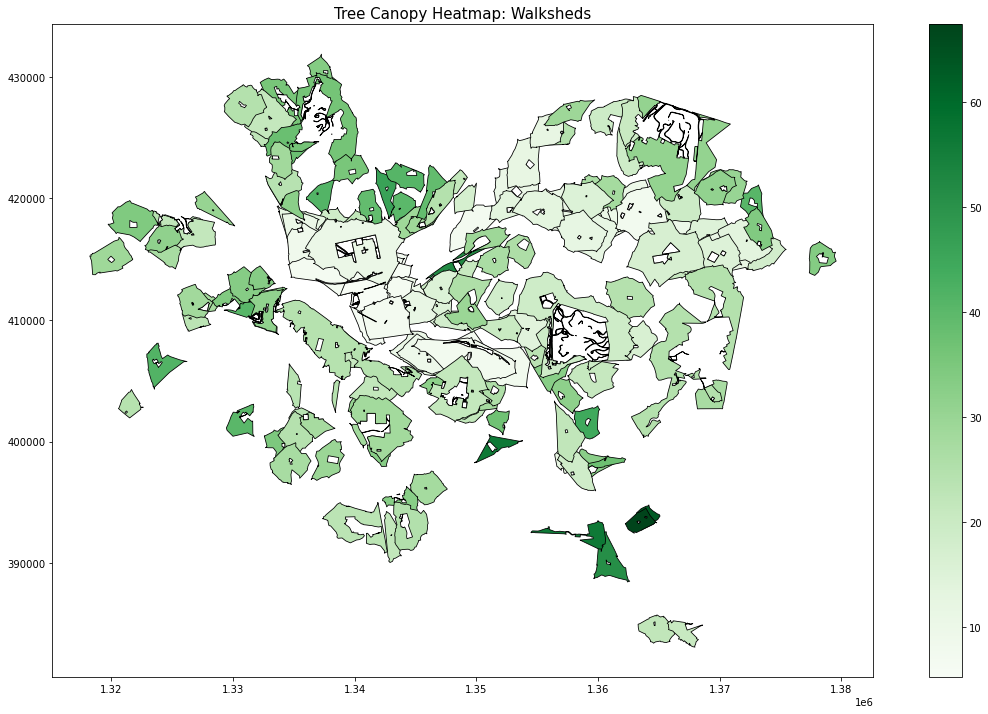

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt



# Plot a heatmap (choropleth) using the "tree_canopy" column
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
environmental_walksheds.plot(column="Tree_Canopy_Walkshed", cmap="Greens", linewidth=0.8, edgecolor="black",
         legend=True, ax=ax)

ax.set_title("Tree Canopy Heatmap: Walksheds", fontsize=15)


plt.show()


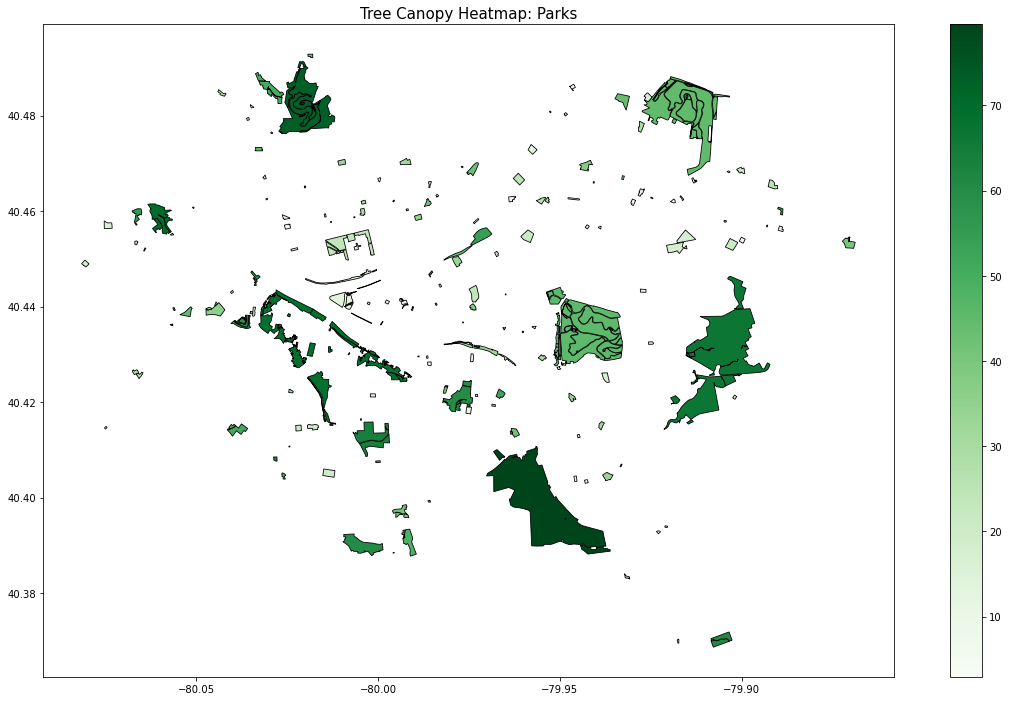

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt



# Plot a heatmap (choropleth) using the "tree_canopy" column
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
environmental_parks.plot(column="Tree_Canopy_Park", cmap="Greens", linewidth=0.8, edgecolor="black",
         legend=True, ax=ax)


ax.set_title("Tree Canopy Heatmap: Parks", fontsize=15)


plt.show()


In [15]:
#Create dataframe of only z scores

#environmental_z_list = ["objectid","updatepknm","Tree_Canopy_Park_Z","Pollution_Park_Z","Sewershed_Park_Z",
             #     "Tree_Canopy_Walkshed_Z","Pollution_Walkshed_Z","Sewershed_Walkshed_Z"]

#environmental_z = environmental[environmental_z_list]

In [16]:
#Create dataframe of only z scores

health_z_list = ["SiteID","asthma_rate","obesity_rate","depression_rate",
                  "diabetes_rate"]

health_z = health[health_z_list]

In [17]:
#rename ID

health_z.rename(columns={'SiteID': 'objectid'}, inplace=True)

C:\Users\MaxBo\AppData\Local\Temp/ipykernel_35920/4183083901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_z.rename(columns={'SiteID': 'objectid'}, inplace=True)


In [18]:
#merge environmental and health

environmental_health_z = environmental.merge(health_z, on='objectid', how='inner')  # Inner join

In [19]:
#check length
len(environmental_health_z)

168

In [20]:
#correlation matrix
environmental_health_z.corr()

,objectid,Tree_Canopy_Park,Pollution_Park,Sewershed_Park,Tree_Canopy_Walkshed,Pollution_Walkshed,Sewershed_Walkshed,percent_rank1,percent_rank2,asthma_rate,obesity_rate,depression_rate,diabetes_rate
objectid,1.000000,-0.001860,-0.074376,-0.083127,0.116172,-0.059719,-0.069627,-0.057318,-0.042895,-0.022809,0.040132,-0.087149,0.092907
Tree_Canopy_Park,-0.001860,1.000000,-0.093478,-0.092190,0.426359,-0.109975,-0.111325,-0.097825,-0.023601,-0.097592,-0.060868,-0.097734,-0.004369
Pollution_Park,-0.074376,-0.093478,1.000000,0.317535,0.143393,0.968455,0.270191,0.264743,0.131795,0.149364,0.291310,-0.161689,0.344211
Sewershed_Park,-0.083127,-0.092190,0.317535,1.000000,-0.029817,0.298798,0.893910,0.349056,0.754513,0.040139,0.050249,-0.041295,0.058328
Tree_Canopy_Walkshed,0.116172,0.426359,0.143393,-0.029817,1.000000,0.143605,-0.049812,-0.063116,0.014399,-0.035832,0.138934,-0.245282,0.311006
Pollution_Walkshed,-0.059719,-0.109975,0.968455,0.298798,0.143605,1.000000,0.270540,0.276277,0.105001,0.187087,0.324973,-0.123782,0.352438
Sewershed_Walkshed,-0.069627,-0.111325,0.270191,0.893910,-0.049812,0.270540,1.000000,0.348890,0.648651,-0.012663,-0.000716,-0.059239,0.017013
percent_rank1,-0.057318,-0.097825,0.264743,0.349056,-0.063116,0.276277,0.348890,1.000000,-0.351638,0.123749,0.068229,0.044674,0.056777
percent_rank2,-0.042895,-0.023601,0.131795,0.754513,0.014399,0.105001,0.648651,-0.351638,1.000000,-0.046577,0.002411,-0.072553,0.018508
asthma_rate,-0.022809,-0.097592,0.149364,0.040139,-0.035832,0.187087,-0.012663,0.123749,-0.046577,1.000000,0.886812,0.673929,0.575891


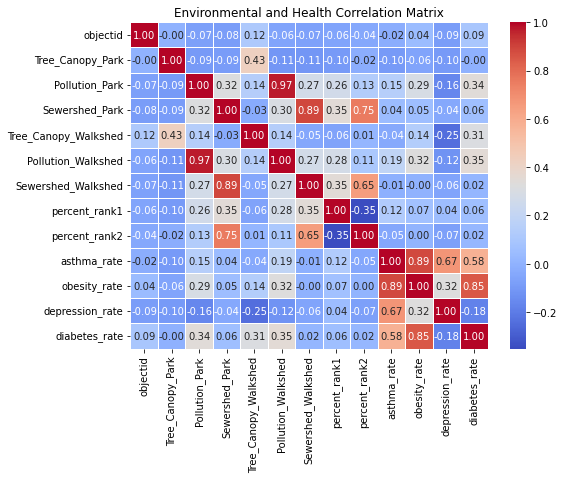

In [21]:
#correlation matrix with heatmap

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = environmental_health_z.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Environmental and Health Correlation Matrix")
plt.show()


In [22]:
environmental['Tree_Canopy_Park'].median()

20.420068027210903

In [23]:
environmental['Tree_Canopy_Park'].std()

17.367852208672517

In [24]:
environmental['Tree_Canopy_Park'].describe()

count    168.000000
mean      26.428736
std       17.367852
min        2.931253
25%       13.500000
50%       20.420068
75%       36.168415
max       79.505395
Name: Tree_Canopy_Park, dtype: float64

In [25]:
#range
environmental['Tree_Canopy_Park'].max() - environmental['Tree_Canopy_Park'].min()

76.57414208121457

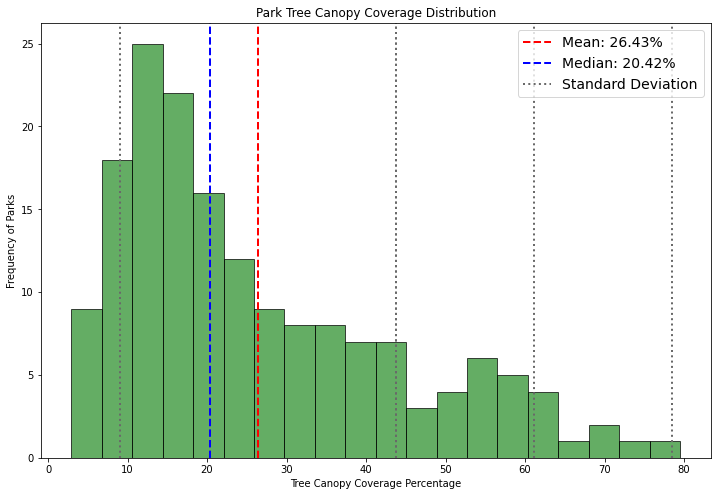

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

mean_value = environmental['Tree_Canopy_Park'].mean()
median_value = environmental['Tree_Canopy_Park'].median()

std_dev = environmental['Tree_Canopy_Park'].std()  # Standard deviation





# Plot histogram for the 'values' column
plt.figure(figsize=(12, 8))
plt.hist(environmental['Tree_Canopy_Park'], bins=20, edgecolor='black', alpha=0.7,color='forestgreen')

#Standard deviation lines along with mean and median lines

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}%')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}%')

plt.axvline(mean_value - std_dev, color='dimgray', linestyle='dotted', linewidth=2)  # -1σ
for i in range(1, 4):
    plt.axvline(mean_value + i * std_dev, color='dimgray', linestyle='dotted', linewidth=2)  # +1σ, +2σ, +3σ

plt.axvline(mean_value + std_dev, color='dimgray', linestyle='dotted', linewidth=2, label='Standard Deviation')

plt.xlabel('Tree Canopy Coverage Percentage')
plt.ylabel('Frequency of Parks')
plt.title('Park Tree Canopy Coverage Distribution')
plt.legend(fontsize=14)

#plt.savefig('Tree Canopy Distribution.jpg', format='jpg')

plt.show()


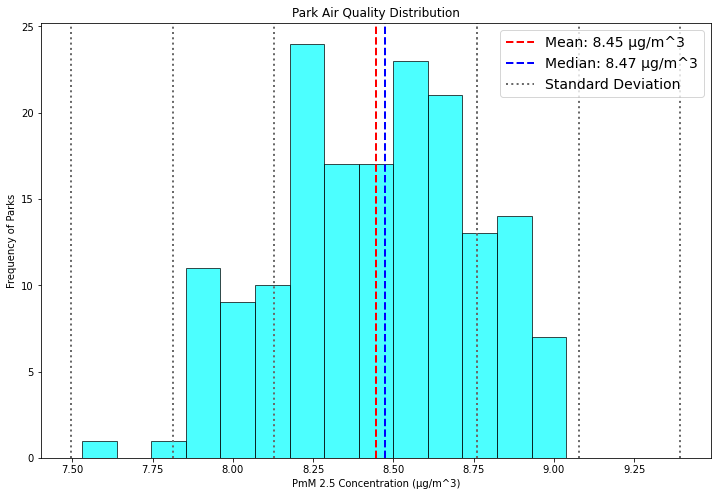

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

mean_value = environmental['Pollution_Park'].mean()
median_value = environmental['Pollution_Park'].median()

std_dev = environmental['Pollution_Park'].std()  # Standard deviation





# Plot histogram for the 'values' column
plt.figure(figsize=(12, 8))
plt.hist(environmental['Pollution_Park'], bins=14, edgecolor='black', alpha=0.7,color='cyan')

#Standard deviation lines along with mean and median lines

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f} μg/m^3')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f} μg/m^3')

plt.axvline(mean_value - std_dev, color='dimgray', linestyle='dotted', linewidth=2) 
plt.axvline(mean_value - 2*std_dev, color='dimgray', linestyle='dotted', linewidth=2)
plt.axvline(mean_value - 3*std_dev, color='dimgray', linestyle='dotted', linewidth=2) 
for i in range(1, 4):
    plt.axvline(mean_value + i * std_dev, color='dimgray', linestyle='dotted', linewidth=2)  # +1σ, +2σ, +3σ


plt.axvline(mean_value + std_dev, color='dimgray', linestyle='dotted', linewidth=2, label='Standard Deviation')


plt.xlabel('PmM 2.5 Concentration (μg/m^3)')
plt.ylabel('Frequency of Parks')
plt.title('Park Air Quality Distribution')
plt.legend(fontsize=14)

#plt.savefig('Pollution Distribution.jpg', format='jpg')

plt.show()


In [28]:
#range

environmental['Pollution_Park'].describe()[7]-environmental['Pollution_Park'].describe()[3]

1.508514900361221

In [29]:
#find IQR

Q1 = environmental['Pollution_Park'].quantile(0.25)
Q3 = environmental['Pollution_Park'].quantile(0.75)
IQR = Q3 - Q1

In [30]:
#lower outlier boundary

Q1 - 1.5 * IQR

7.5605996222416385

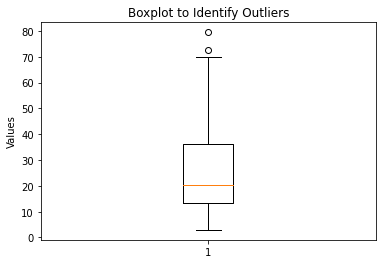

In [31]:
#boxplot

plt.boxplot(environmental['Tree_Canopy_Park'])
plt.title('Boxplot to Identify Outliers')
plt.ylabel('Values')
plt.show()

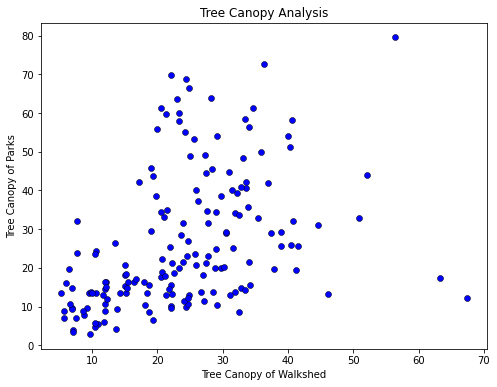

In [32]:
#scatterplot for tree canopy parks vs walksheds

plt.figure(figsize=(8, 6))
sns.scatterplot(x=environmental['Tree_Canopy_Walkshed'], y=environmental['Tree_Canopy_Park'], color='blue', edgecolor='black')


plt.xlabel("Tree Canopy of Walkshed")
plt.ylabel("Tree Canopy of Parks")
plt.title("Tree Canopy Analysis")


plt.show()

In [33]:
#Extract acrage of parks
path = 'C:/Users/MaxBo/OneDrive/Documents/Class MQE/Capstone/Data Files/EnvironmentalFinalized'
# Set the working directory to the desired path
os.chdir(path)

all_variables = pd.read_csv('Parks_All_Variables.csv')

In [34]:
acreage = all_variables[['objectid','acreage']]

In [35]:
acreage

,objectid,acreage
0,1,1.659517
1,2,0.381545
2,3,2.506242
3,4,2.212886
4,5,1.184479
...,...,...
163,500000,0.373371
164,500001,0.070976
165,500002,0.861385
166,500003,2.513096


In [36]:
#make concise dataframe and merge with acreage

tree = environmental[['updatepknm','Tree_Canopy_Park','Tree_Canopy_Walkshed','objectid']]

In [37]:
tree = tree.merge(acreage, on='objectid', how='inner')

In [38]:
health

,SiteID,SiteName,total_population_18plus,total_asthma,total_obesity,total_depression,total_diabetes,asthma_rate,obesity_rate,depression_rate,diabetes_rate
0,1,Able Long Park,954,102.00,309.00,228.00,101.00,0.106918,0.323899,0.238994,0.105870
1,2,Albert Turk Graham Park,2287,285.00,765.00,592.00,246.00,0.124617,0.334499,0.258854,0.107564
2,3,Buhl Community Park at Allegheny Square,2090,276.25,848.75,603.75,268.75,0.132177,0.406100,0.288876,0.128589
3,4,Allegheny Landing Park,1700,206.40,579.60,487.20,148.80,0.121412,0.340941,0.286588,0.087529
4,5,Allegheny Riverfront Park,2213,267.60,748.80,642.00,189.60,0.120922,0.338364,0.290104,0.085676
...,...,...,...,...,...,...,...,...,...,...,...
163,300016,South Shore Riverfront Park,1896,233.75,610.00,573.75,142.50,0.123286,0.321730,0.302611,0.075158
164,500000,Glen Hazel Senior Center,94,12.00,40.00,21.00,18.00,0.127660,0.425532,0.223404,0.191489
165,500001,Overbrook Senior Center,591,63.00,194.00,145.00,66.00,0.106599,0.328257,0.245347,0.111675
166,500002,Panorama Field,38,4.00,14.00,9.00,5.00,0.105263,0.368421,0.236842,0.131579


In [39]:
#Add in depression for extra dimension of analysis

health.rename(columns={'SiteID': 'objectid'}, inplace=True)

health_depression = health[['objectid','depression_rate']]



In [40]:
#merge

tree = tree.merge(health_depression, on='objectid', how='inner')

In [41]:
#Calcuate park-walkshed ratio for each park

tree['tree_ratio'] = tree['Tree_Canopy_Park'] / tree['Tree_Canopy_Walkshed']

In [42]:
#add dummy variable on adjustable cutoff condtion
cutoff=.5

tree['target'] = tree['tree_ratio'].apply(lambda x: 1 if x <= cutoff else 0)

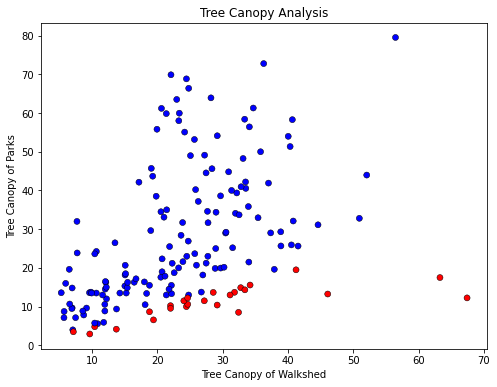

In [43]:
#scatterplot for tree canopy parks vs walksheds with indication of parks with low tree canopy compared to walkshed

color = tree['target'].map({0:'blue',1:'red'})

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tree['Tree_Canopy_Walkshed'], y=tree['Tree_Canopy_Park'],c = color, edgecolor='black')


plt.xlabel("Tree Canopy of Walkshed")
plt.ylabel("Tree Canopy of Parks")
plt.title("Tree Canopy Analysis")


plt.show()

In [44]:
#Filter by parks with low tree canopy compared to their walkshed

tree2 = tree[tree['target']==1]
tree2.sort_values(by='tree_ratio')

,updatepknm,Tree_Canopy_Park,Tree_Canopy_Walkshed,objectid,acreage,depression_rate,tree_ratio,target
165,Panorama Field,12.250000,67.404412,500002,0.861385,0.236842,0.181739,1
84,Marshall-California Park,8.519277,32.425629,117,0.260198,0.341108,0.262733,1
108,Roland Lockridge Community Park,17.500000,63.257840,158,0.468682,0.256410,0.276646,1
113,Scherer Park,13.250000,46.075630,165,1.011202,0.248062,0.287571,1
116,Southside Market House,2.931253,9.654082,169,0.412195,0.255523,0.303628,1
64,Homewood Senior Center,4.168893,13.721649,91,0.221227,0.206490,0.303819,1
69,Larimer Park,6.571429,19.406940,98,1.475392,0.245760,0.338612,1
47,Fifty-Seventh Street Park,10.400000,29.157044,63,2.084561,0.246894,0.356689,1
39,East Carnegie Park,10.000000,24.446215,52,0.470285,0.231707,0.409061,1
155,Paulson Rec Center,13.000000,31.128289,209488,0.390467,0.189873,0.417627,1


In [45]:
#Labelling for plot is going to be challenging. Split data into right and left shifted labels.
#First reset index

tree2.reset_index(drop=True, inplace=True)

In [46]:
tree2

,updatepknm,Tree_Canopy_Park,Tree_Canopy_Walkshed,objectid,acreage,depression_rate,tree_ratio,target
0,Arlington Park,10.238095,22.012456,11,4.207161,0.249315,0.465105,1
1,Chartiers Park,15.571429,34.192593,35,6.148460,0.232456,0.455404,1
2,Cross and Strauss Park,19.500000,41.226891,42,0.296044,0.214602,0.472992,1
3,East Carnegie Park,10.000000,24.446215,52,0.470285,0.231707,0.409061,1
4,Fifty-Seventh Street Park,10.400000,29.157044,63,2.084561,0.246894,0.356689,1
5,Four Mile Run Park,14.888889,32.764398,67,1.764124,0.317500,0.454423,1
6,Hazelwood Senior Center,8.666667,18.794830,84,1.306664,0.230986,0.461120,1
7,Homewood Senior Center,4.168893,13.721649,91,0.221227,0.206490,0.303819,1
8,Larimer Park,6.571429,19.406940,98,1.475392,0.245760,0.338612,1
9,Manchester School Park,4.800000,10.410538,114,3.046747,0.278330,0.461071,1


In [47]:
tree2['depression_rate'].mean()

0.25291377057903325

In [48]:

#Split data into right and left label dataframes
#This is to add labels for the scatterplot below!

tree2_right_indices = [9,16,14,3,4,11,17]

right_shift = tree2[tree2.index.isin(tree2_right_indices)]
left_shift = tree2[tree2.index.isin(tree2_right_indices)==False]

In [49]:
#Reset right shifted index
right_shift.reset_index(drop=True, inplace=True)

In [50]:
#Reset left shifted index
left_shift.reset_index(drop=True, inplace=True)

In [51]:
right_shift.head()

,updatepknm,Tree_Canopy_Park,Tree_Canopy_Walkshed,objectid,acreage,depression_rate,tree_ratio,target
0,East Carnegie Park,10.000000,24.446215,52,0.470285,0.231707,0.409061,1
1,Fifty-Seventh Street Park,10.400000,29.157044,63,2.084561,0.246894,0.356689,1
2,Manchester School Park,4.800000,10.410538,114,3.046747,0.278330,0.461071,1
3,Mutual Park,11.500000,27.184433,133,0.345286,0.221698,0.423036,1
4,Southside Market House,2.931253,9.654082,169,0.412195,0.255523,0.303628,1


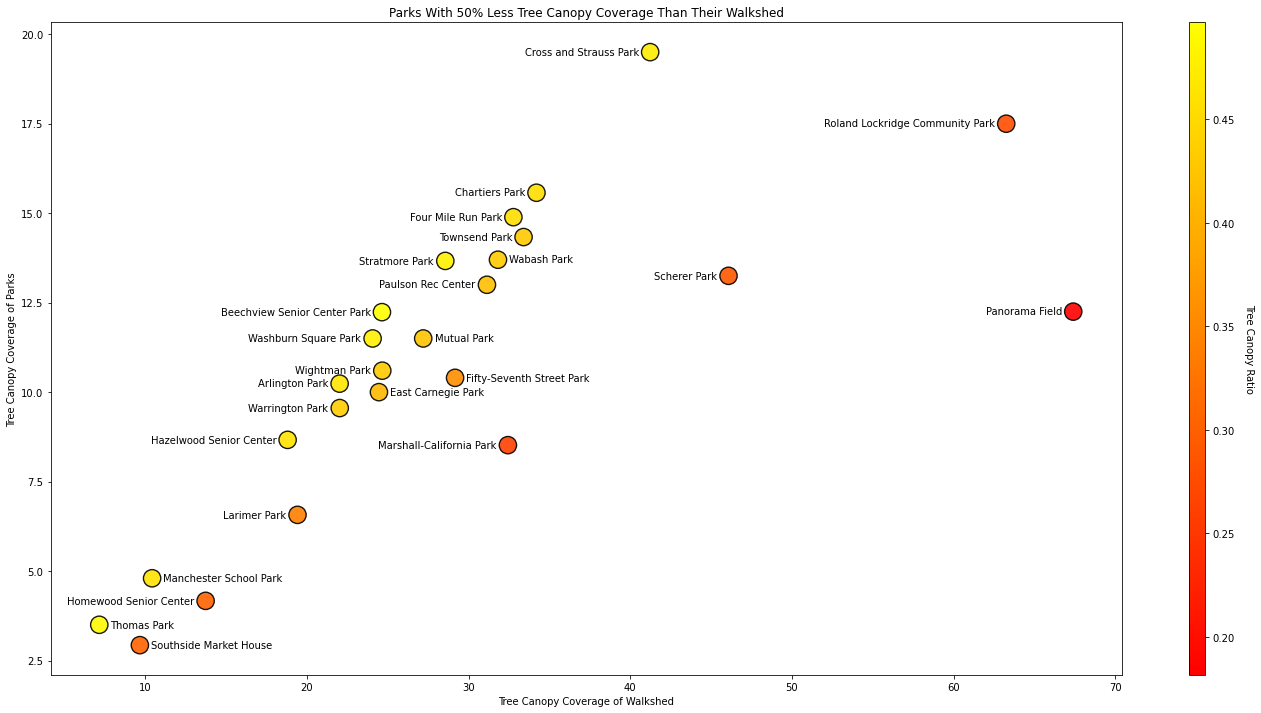

In [52]:
plt.figure(figsize=(24, 12))
sns.scatterplot(x=tree2['Tree_Canopy_Walkshed'], y=tree2['Tree_Canopy_Park'],c=tree2['tree_ratio'], cmap='autumn',
                s=300, edgecolor='k', alpha=.9)


norm = plt.Normalize(tree2['tree_ratio'].min(), tree2['tree_ratio'].max())
sm = plt.cm.ScalarMappable(cmap='autumn', norm=norm)
sm.set_array([])

#Add left shifted labels
for i, txt in enumerate(left_shift['updatepknm']):
    plt.text(left_shift['Tree_Canopy_Walkshed'][i]-.7, 
             left_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='right', 
             va='center',
            rotation=0)
    
#Add right shifted labels
for i, txt in enumerate(right_shift['updatepknm']):
    plt.text(right_shift['Tree_Canopy_Walkshed'][i]+.7, 
             right_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='left', 
             va='center',
            rotation=0)


clb = plt.colorbar(sm,label="Tree Canopy Ratio",aspect=40)
clb.set_label('Tree Canopy Ratio', labelpad=20, rotation=270)

plt.xlabel("Tree Canopy Coverage of Walkshed")
plt.ylabel("Tree Canopy Coverage of Parks")
plt.title("Parks With 50% Less Tree Canopy Coverage Than Their Walkshed")




plt.show()


In [53]:
#Plot sports and buildings parks as non circles
#So, export to excel for manual data entry. Need to check google earth to see
#if the parks are sports fields or buildings. 

#tree2.to_csv('Parks_with_low_ratio.csv', index=False)

In [54]:
#returned from excel and google earth, read in data with new column "include"

tree2 = pd.read_csv('Parks_with_low_ratio.csv')

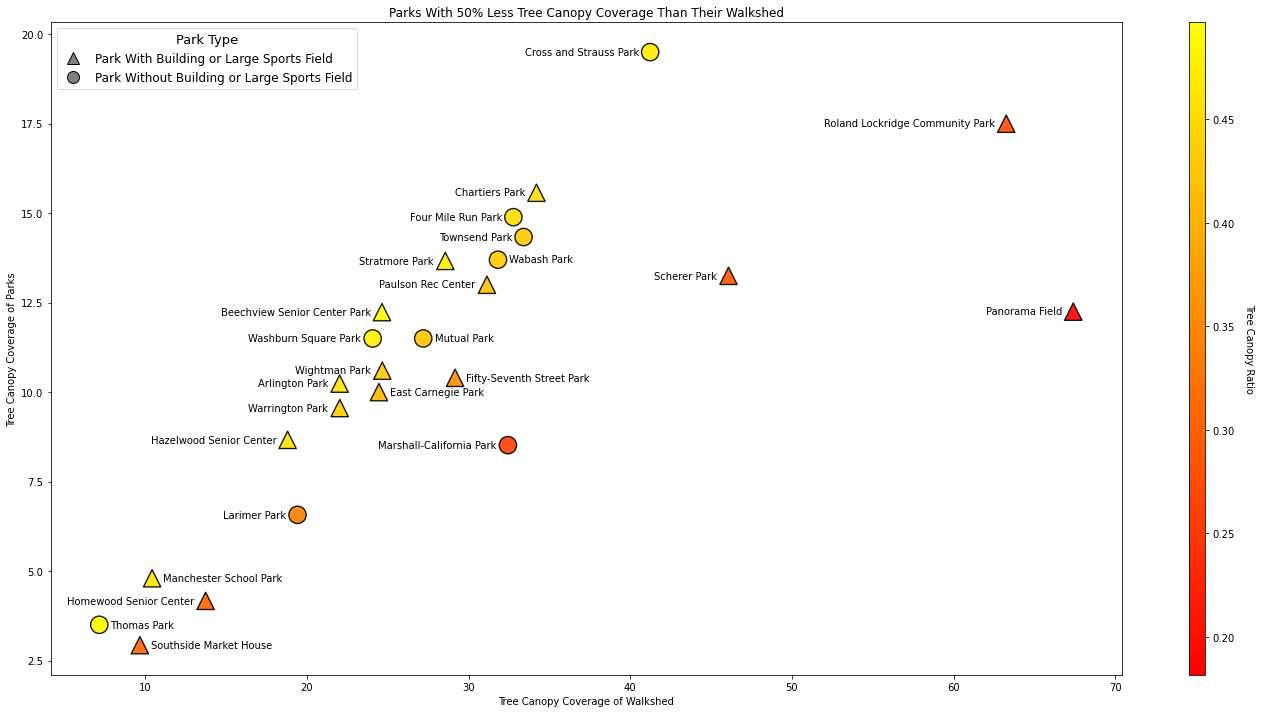

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

plt.figure(figsize=(24, 12))


sns.scatterplot(
    x=tree2['Tree_Canopy_Walkshed'],
    y=tree2['Tree_Canopy_Park'],
    hue=tree2['tree_ratio'],
    style=tree2['include'],  # 0 = with building (triangle), 1 = no building (circle)
    markers={0: '^', 1: 'o'},
    palette='autumn',
    s=300,
    edgecolor='k',
    alpha=0.9,
    legend=False  
)

# Normalize colorbar
norm = plt.Normalize(tree2['tree_ratio'].min(), tree2['tree_ratio'].max())
sm = plt.cm.ScalarMappable(cmap='autumn', norm=norm)
sm.set_array([])

# Add labels - Left shift
for i, txt in enumerate(left_shift['updatepknm']):
    plt.text(left_shift['Tree_Canopy_Walkshed'][i] - 0.7,
             left_shift['Tree_Canopy_Park'][i],
             str(txt),
             fontsize=10,
             ha='right',
             va='center')

# Add labels - Right shift
for i, txt in enumerate(right_shift['updatepknm']):
    plt.text(right_shift['Tree_Canopy_Walkshed'][i] + 0.7,
             right_shift['Tree_Canopy_Park'][i],
             str(txt),
             fontsize=10,
             ha='left',
             va='center')

# Add colorbar
clb = plt.colorbar(sm, label="Tree Canopy Ratio", aspect=40)
clb.set_label('Tree Canopy Ratio', labelpad=20, rotation=270)

# Custom legend for marker shape
legend_elements = [
    Line2D([0], [0], marker='^', color='w', label='Park With Building or Large Sports Field',
           markerfacecolor='gray', markersize=12, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Park Without Building or Large Sports Field',
           markerfacecolor='gray', markersize=12, markeredgecolor='k')
]

plt.legend(handles=legend_elements, title='Park Type', loc='upper left', fontsize=12, title_fontsize=13)

plt.xlabel("Tree Canopy Coverage of Walkshed")
plt.ylabel("Tree Canopy Coverage of Parks")
plt.title("Parks With 50% Less Tree Canopy Coverage Than Their Walkshed")

#plt.savefig('Less_Than_50_Acreage_Distinguished.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()



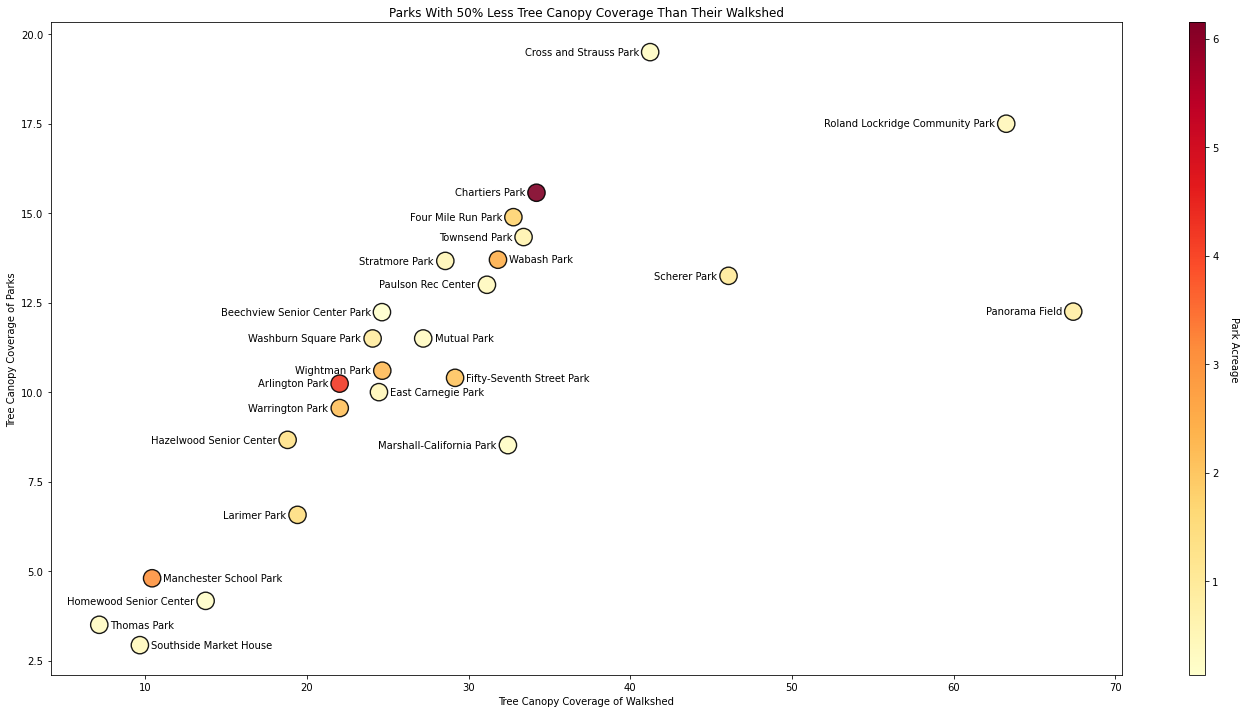

In [56]:
plt.figure(figsize=(24, 12))



sns.scatterplot(x=tree2['Tree_Canopy_Walkshed'], y=tree2['Tree_Canopy_Park'],c=tree2['acreage'], cmap='YlOrRd',
                s=300, edgecolor='k', alpha=.9)


norm = plt.Normalize(tree2['acreage'].min(), tree2['acreage'].max())
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
sm.set_array([])

#Add left shifted labels
for i, txt in enumerate(left_shift['updatepknm']):
    plt.text(left_shift['Tree_Canopy_Walkshed'][i]-.7, 
             left_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='right', 
             va='center',
            rotation=0)
    
#Add right shifted labels
for i, txt in enumerate(right_shift['updatepknm']):
    plt.text(right_shift['Tree_Canopy_Walkshed'][i]+.7, 
             right_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='left', 
             va='center',
            rotation=0)


clb = plt.colorbar(sm,label="Park Acreage",aspect=40)
clb.set_label('Park Acreage', labelpad=20, rotation=270)

plt.xlabel("Tree Canopy Coverage of Walkshed")
plt.ylabel("Tree Canopy Coverage of Parks")
plt.title("Parks With 50% Less Tree Canopy Coverage Than Their Walkshed")


#plt.savefig('Less_Than_50_Acreage.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()


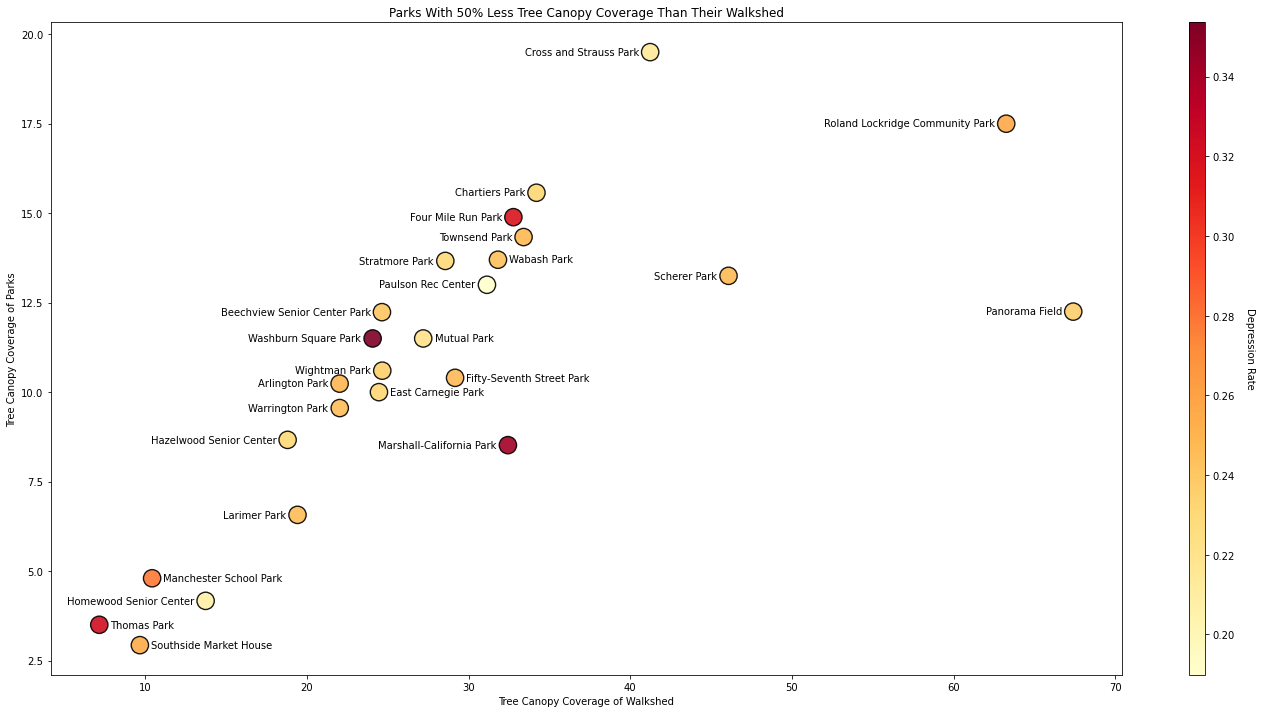

In [57]:
plt.figure(figsize=(24, 12))
sns.scatterplot(x=tree2['Tree_Canopy_Walkshed'], y=tree2['Tree_Canopy_Park'],c=tree2['depression_rate'], cmap='YlOrRd',
                s=300, edgecolor='k', alpha=.9)


norm = plt.Normalize(tree2['depression_rate'].min(), tree2['depression_rate'].max())
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
sm.set_array([])

#Add left shifted labels
for i, txt in enumerate(left_shift['updatepknm']):
    plt.text(left_shift['Tree_Canopy_Walkshed'][i]-.7, 
             left_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='right', 
             va='center',
            rotation=0)
    
#Add right shifted labels
for i, txt in enumerate(right_shift['updatepknm']):
    plt.text(right_shift['Tree_Canopy_Walkshed'][i]+.7, 
             right_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='left', 
             va='center',
            rotation=0)


clb = plt.colorbar(sm,label="Depression Rate",aspect=40)
clb.set_label('Depression Rate', labelpad=20, rotation=270)

plt.xlabel("Tree Canopy Coverage of Walkshed")
plt.ylabel("Tree Canopy Coverage of Parks")
plt.title("Parks With 50% Less Tree Canopy Coverage Than Their Walkshed")




plt.show()

In [58]:
# add dummy variable on adjustable cutoff condtion
cutoff_low=.5
cutoff_high=1.5

tree['target'] = tree['tree_ratio'].apply(lambda x: 1 if x <= cutoff_low else 2 if x >= cutoff_high else 0)


In [59]:
#Filter by parks with high tree canopy compared to their walkshed

tree_high = tree[tree['target']==2]
tree_high.sort_values(by='tree_ratio',ascending=False)

,updatepknm,Tree_Canopy_Park,Tree_Canopy_Walkshed,objectid,acreage,depression_rate,tree_ratio,target
118,Southside Riverfront Park,32.000000,7.693918,171,16.753652,0.249763,4.159130,2
114,Sheraden Park,69.872807,22.085202,167,51.157644,0.228052,3.163784,2
161,South Shore Riverfront Park,23.857143,7.727414,300016,3.277700,0.302611,3.087338,2
3,Allegheny Landing Park,19.625000,6.517986,4,2.212886,0.286588,3.010900,2
86,McBride Park,61.191919,20.626761,119,22.728311,0.247104,2.966628,2
167,Emerald View Combined,68.819079,24.449708,2100,270.365828,0.279043,2.814720,2
117,Southside Park,59.841699,21.367905,170,57.475858,0.250794,2.800541,2
25,August Wilson Park,55.800000,19.940887,36,1.113177,0.210970,2.798271,2
17,Boundary Street Park,63.500000,22.964169,25,0.457571,0.412896,2.765177,2
82,Market Square Park,16.000000,5.965966,115,0.669738,0.363188,2.681879,2


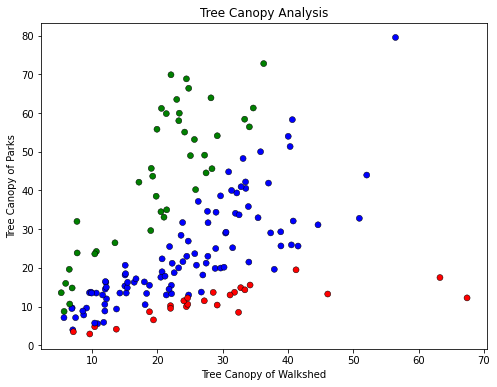

In [60]:
#scatterplot for tree canopy parks vs walksheds with indication of parks with low tree canopy compared to walkshed

color = tree['target'].map({0:'blue',1:'red',2:'green'})
labels = tree['target'].map({0: "Balanced", 1: "Low Canopy in Parks", 2: "Low Canopy in Walksheds"})

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tree['Tree_Canopy_Walkshed'], y=tree['Tree_Canopy_Park'],c = color, edgecolor='black')



plt.xlabel("Tree Canopy of Walkshed")
plt.ylabel("Tree Canopy of Parks")
plt.title("Tree Canopy Analysis")


plt.show()

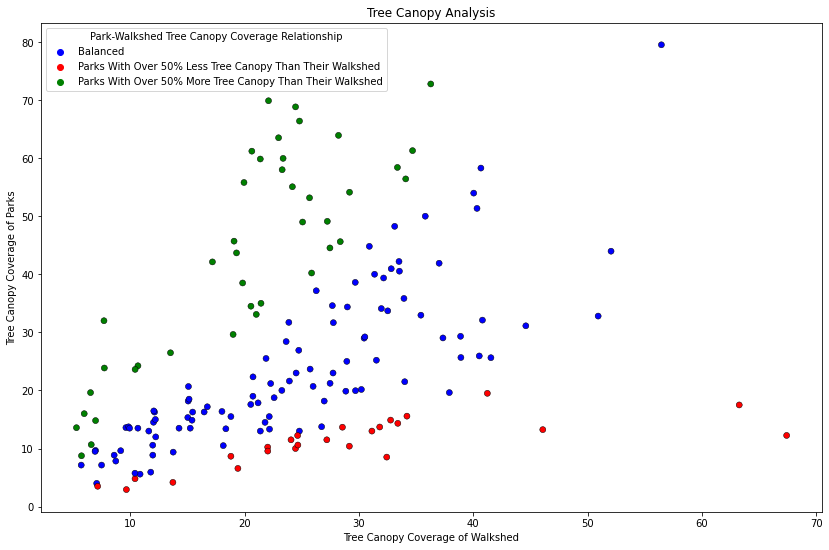

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns


color_mapping = {0: 'blue', 1: 'red', 2: 'green'}
labels = {0: "Balanced", 1: "Parks With Over 50% Less Tree Canopy Than Their Walkshed", 2: "Parks With Over 50% More Tree Canopy Than Their Walkshed"}

plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(
    x=tree['Tree_Canopy_Walkshed'], 
    y=tree['Tree_Canopy_Park'], 
    hue=tree['target'],  
    palette=color_mapping,  
    edgecolor='black'
)

# Modify legend labels
handles, _ = scatter.get_legend_handles_labels()
plt.legend(handles, labels.values(), title="Park-Walkshed Tree Canopy Coverage Relationship")

plt.xlabel("Tree Canopy Coverage of Walkshed")
plt.ylabel("Tree Canopy Coverage of Parks")
plt.title("Tree Canopy Analysis")

#plt.savefig('Tree Canopy Analysis.jpg', format='jpg')

plt.show()

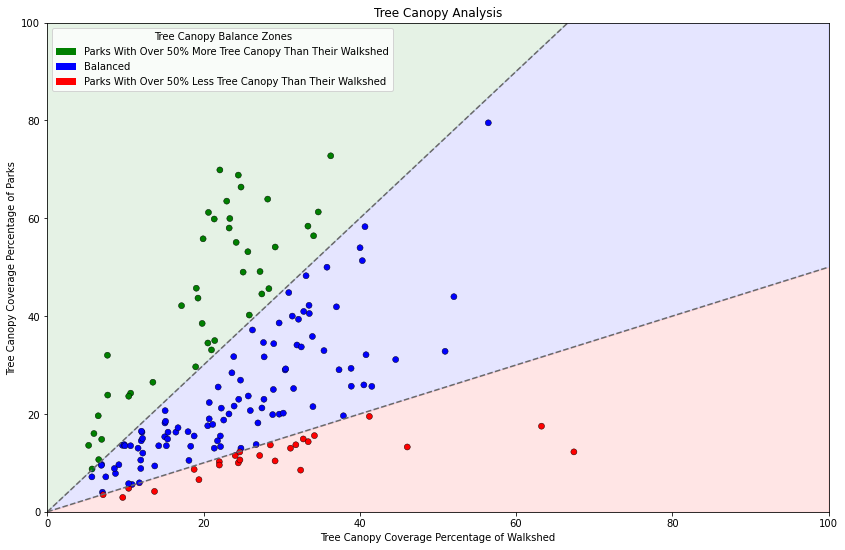

In [62]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch

plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(
    x=tree['Tree_Canopy_Walkshed'], 
    y=tree['Tree_Canopy_Park'], 
    hue=tree['target'],  
    palette=color_mapping,  
    edgecolor='black',
    legend=False  
)

x_vals = np.linspace(0, 100, 500)
y_lower = 0.5 * x_vals
y_upper = 1.5 * x_vals
y_max = 100
y_min = 0

# Fill areas with zonal color
plt.fill_between(x_vals, y_upper, y_max, color='green', alpha=0.1)
plt.fill_between(x_vals, y_lower, y_upper, color='blue', alpha=0.1)
plt.fill_between(x_vals, y_min, y_lower, color='red', alpha=0.1)

# Draw the lines by simple slope calculation
plt.plot(x_vals, y_lower, linestyle='--', color='dimgrey', label='y = 0.5x')
plt.plot(x_vals, y_upper, linestyle='--', color='dimgrey', label='y = 1.5x')

# Custom zone legend
region_patches = [
    Patch(facecolor='green', alpha=1, label='Parks With Over 50% More Tree Canopy Than Their Walkshed'),
    Patch(facecolor='blue', alpha=1, label='Balanced'),
    Patch(facecolor='red', alpha=1, label='Parks With Over 50% Less Tree Canopy Than Their Walkshed')
]
plt.legend(handles=region_patches, title="Tree Canopy Balance Zones", loc='upper left')

plt.ylim(0, 100)
plt.xlim(0, 100)
plt.xlabel("Tree Canopy Coverage Percentage of Walkshed")
plt.ylabel("Tree Canopy Coverage Percentage of Parks")
plt.title("Tree Canopy Analysis")

#plt.savefig('Tree_Canopy_Analysis.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()



In [63]:
#reset green zone index for scatterplot below

tree_high.reset_index(drop=True, inplace=True)

In [64]:
tree_high.sort_values(by='tree_ratio',ascending=False)

,updatepknm,Tree_Canopy_Park,Tree_Canopy_Walkshed,objectid,acreage,depression_rate,tree_ratio,target
31,Southside Riverfront Park,32.000000,7.693918,171,16.753652,0.249763,4.159130,2
29,Sheraden Park,69.872807,22.085202,167,51.157644,0.228052,3.163784,2
38,South Shore Riverfront Park,23.857143,7.727414,300016,3.277700,0.302611,3.087338,2
1,Allegheny Landing Park,19.625000,6.517986,4,2.212886,0.286588,3.010900,2
19,McBride Park,61.191919,20.626761,119,22.728311,0.247104,2.966628,2
40,Emerald View Combined,68.819079,24.449708,2100,270.365828,0.279043,2.814720,2
30,Southside Park,59.841699,21.367905,170,57.475858,0.250794,2.800541,2
9,August Wilson Park,55.800000,19.940887,36,1.113177,0.210970,2.798271,2
7,Boundary Street Park,63.500000,22.964169,25,0.457571,0.412896,2.765177,2
18,Market Square Park,16.000000,5.965966,115,0.669738,0.363188,2.681879,2


In [65]:
print(f'Trees in the Green Zone consist of {round(((len(tree_high)/168)*100),2)}% of all parks. There are {len(tree_high)} parks in this category.')

print(f'Trees in the Red Zone consist of {round(((len(tree2)/168)*100),1)}% of all parks. There are {len(tree2)} parks in this category.')

Trees in the Green Zone consist of 24.4% of all parks. There are 41 parks in this category.
Trees in the Red Zone consist of 14.9% of all parks. There are 25 parks in this category.


In [66]:
tree_high['depression_rate'].mean()

0.26500182092951186

In [67]:
#Split data into six different label shifts since plot is convoluted


tree_high_right_indices = [31,5,1,23,2,36,34,24,8,40,6]

tree_high_bottom_indices = [13]

tree_high_top_indices = [38]

tree_high_top_right = [18]

tree_high_bottom_right = [26]

tree_high_left_not = [31,5,1,18,23,26,2,36,34,24,8,40,6,13,38]

right_shift = tree_high[tree_high.index.isin(tree_high_right_indices)]
left_shift = tree_high[tree_high.index.isin(tree_high_left_not)==False]
top_shift = tree_high[tree_high.index.isin(tree_high_bottom_indices)]
bottom_shift = tree_high[tree_high.index.isin(tree_high_top_indices)]
top_right_shift = tree_high[tree_high.index.isin(tree_high_top_right)]
bottom_right_shift = tree_high[tree_high.index.isin(tree_high_bottom_right)]

In [68]:
#Reset index

right_shift.reset_index(drop=True, inplace=True)
left_shift.reset_index(drop=True, inplace=True)
top_shift.reset_index(drop=True, inplace=True)
bottom_shift.reset_index(drop=True, inplace=True)
top_right_shift.reset_index(drop=True, inplace=True)
bottom_right_shift.reset_index(drop=True, inplace=True)

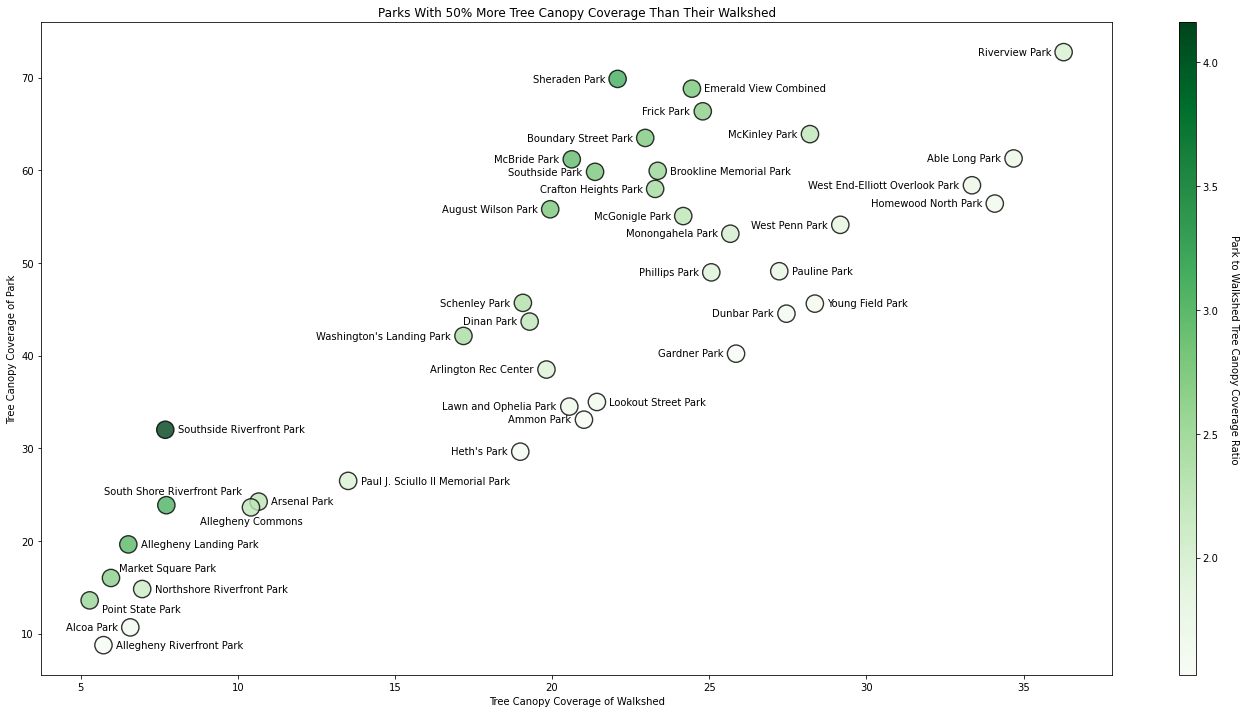

In [69]:
plt.figure(figsize=(24, 12))



sns.scatterplot(x=tree_high['Tree_Canopy_Walkshed'], y=tree_high['Tree_Canopy_Park'],c=tree_high['tree_ratio'], cmap='Greens',
                s=300, edgecolor='k', alpha=.8)


norm = plt.Normalize(tree_high['tree_ratio'].min(), tree_high['tree_ratio'].max())
sm = plt.cm.ScalarMappable(cmap='Greens', norm=norm)
sm.set_array([])

#Add left shifted labels
for i, txt in enumerate(left_shift['updatepknm']):
    plt.text(left_shift['Tree_Canopy_Walkshed'][i]-.4, 
             left_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='right', 
             va='center',
            rotation=0)
    
#Add right shifted labels
for i, txt in enumerate(right_shift['updatepknm']):
    plt.text(right_shift['Tree_Canopy_Walkshed'][i]+.4, 
             right_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='left', 
             va='center',
            rotation=0)
    
#Add top shifted labels
for i, txt in enumerate(top_shift['updatepknm']):
    plt.text(top_shift['Tree_Canopy_Walkshed'][i], 
             top_shift['Tree_Canopy_Park'][i]-1.5, 
             str(txt), 
             fontsize=10, 
             ha='center', 
             va='center',
            rotation=0)
    
#Add bottom shifted labels
for i, txt in enumerate(bottom_shift['updatepknm']):
    plt.text(bottom_shift['Tree_Canopy_Walkshed'][i]+.2, 
             bottom_shift['Tree_Canopy_Park'][i]+1.5, 
             str(txt), 
             fontsize=10, 
             ha='center', 
             va='center',
            rotation=0)
    
#Add top right shifted labels
for i, txt in enumerate(top_right_shift['updatepknm']):
    plt.text(top_right_shift['Tree_Canopy_Walkshed'][i]+.25, 
             top_right_shift['Tree_Canopy_Park'][i]+1, 
             str(txt), 
             fontsize=10, 
             ha='left', 
             va='center',
            rotation=0)
    
#Add bottom right shifted labels
for i, txt in enumerate(bottom_right_shift['updatepknm']):
    plt.text(bottom_right_shift['Tree_Canopy_Walkshed'][i]+.4, 
             bottom_right_shift['Tree_Canopy_Park'][i]-1, 
             str(txt), 
             fontsize=10, 
             ha='left', 
             va='center',
            rotation=0)


clb = plt.colorbar(sm,label="Park to Walkshed Ratio",aspect=40)
clb.set_label('Park to Walkshed Tree Canopy Coverage Ratio', labelpad=20, rotation=270)

plt.xlabel("Tree Canopy Coverage of Walkshed")
plt.ylabel("Tree Canopy Coverage of Park")
plt.title("Parks With 50% More Tree Canopy Coverage Than Their Walkshed")

#plt.savefig('50% More Tree Canopy.jpg', format='jpg')


plt.show()

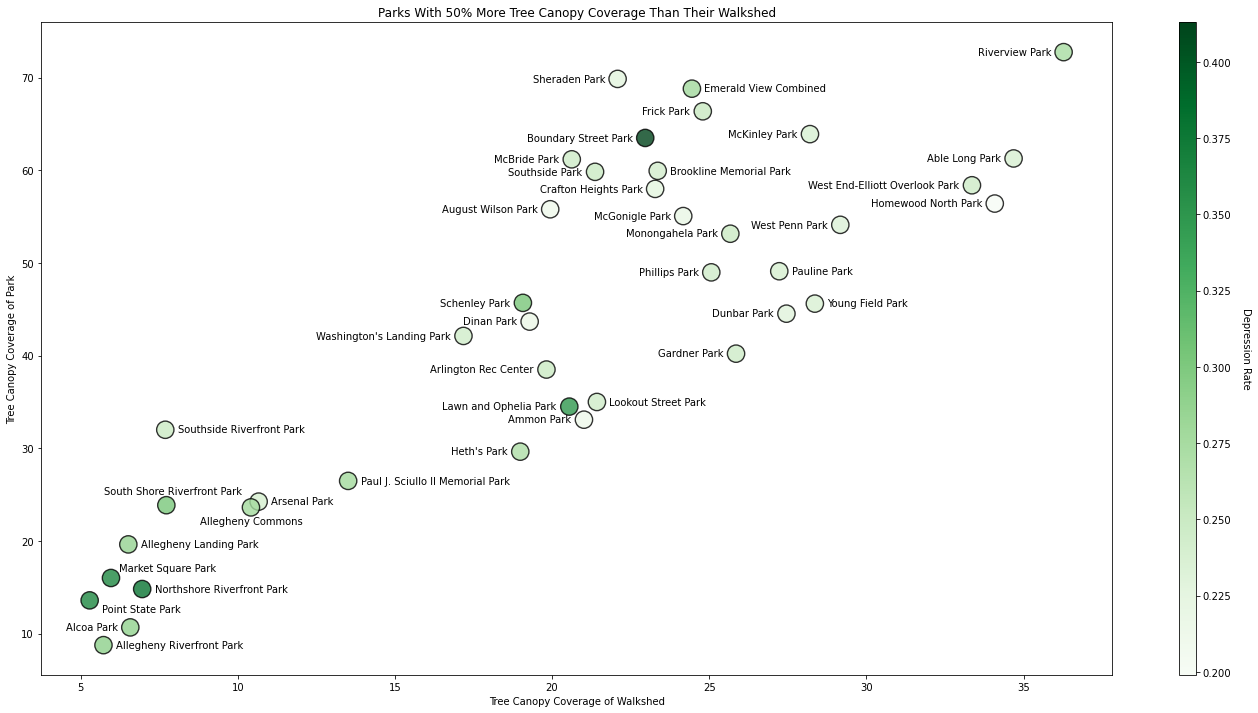

In [70]:
plt.figure(figsize=(24, 12))
sns.scatterplot(x=tree_high['Tree_Canopy_Walkshed'], y=tree_high['Tree_Canopy_Park'],c=tree_high['depression_rate'], cmap='Greens',
                s=300, edgecolor='k', alpha=.8)


norm = plt.Normalize(tree_high['depression_rate'].min(), tree_high['depression_rate'].max())
sm = plt.cm.ScalarMappable(cmap='Greens', norm=norm)
sm.set_array([])

#Add left shifted labels
for i, txt in enumerate(left_shift['updatepknm']):
    plt.text(left_shift['Tree_Canopy_Walkshed'][i]-.4, 
             left_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='right', 
             va='center',
            rotation=0)
    
#Add right shifted labels
for i, txt in enumerate(right_shift['updatepknm']):
    plt.text(right_shift['Tree_Canopy_Walkshed'][i]+.4, 
             right_shift['Tree_Canopy_Park'][i], 
             str(txt), 
             fontsize=10, 
             ha='left', 
             va='center',
            rotation=0)
    
#Add top shifted labels
for i, txt in enumerate(top_shift['updatepknm']):
    plt.text(top_shift['Tree_Canopy_Walkshed'][i], 
             top_shift['Tree_Canopy_Park'][i]-1.5, 
             str(txt), 
             fontsize=10, 
             ha='center', 
             va='center',
            rotation=0)
    
#Add bottom shifted labels
for i, txt in enumerate(bottom_shift['updatepknm']):
    plt.text(bottom_shift['Tree_Canopy_Walkshed'][i]+.2, 
             bottom_shift['Tree_Canopy_Park'][i]+1.5, 
             str(txt), 
             fontsize=10, 
             ha='center', 
             va='center',
            rotation=0)
    
#Add top right shifted labels
for i, txt in enumerate(top_right_shift['updatepknm']):
    plt.text(top_right_shift['Tree_Canopy_Walkshed'][i]+.25, 
             top_right_shift['Tree_Canopy_Park'][i]+1, 
             str(txt), 
             fontsize=10, 
             ha='left', 
             va='center',
            rotation=0)
    
#Add bottom right shifted labels
for i, txt in enumerate(bottom_right_shift['updatepknm']):
    plt.text(bottom_right_shift['Tree_Canopy_Walkshed'][i]+.4, 
             bottom_right_shift['Tree_Canopy_Park'][i]-1, 
             str(txt), 
             fontsize=10, 
             ha='left', 
             va='center',
            rotation=0)


clb = plt.colorbar(sm,label="Depression Rate",aspect=40)
clb.set_label('Depression Rate', labelpad=20, rotation=270)

plt.xlabel("Tree Canopy Coverage of Walkshed")
plt.ylabel("Tree Canopy Coverage of Park")
plt.title("Parks With 50% More Tree Canopy Coverage Than Their Walkshed")

#plt.savefig('50% More Tree Canopy.jpg', format='jpg')


plt.show()

In [71]:
tree_reg = tree

In [72]:
#Now time for regression between acreage and tree canopy. Take log transformation of our x variable: acreage

tree_reg['log_acres'] = np.log(tree_reg['acreage'])

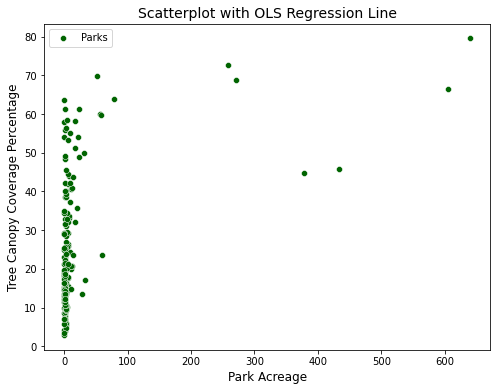

In [73]:
#Create scatterplot without log transformed acreage first
X = tree['acreage']
Y = tree_reg['Tree_Canopy_Park']



plt.figure(figsize=(8, 6))

sns.scatterplot(x=X, y=Y, label='Parks', color='darkgreen')



plt.title("Scatterplot with OLS Regression Line", fontsize=14)
plt.xlabel("Park Acreage", fontsize=12)
plt.ylabel("Tree Canopy Coverage Percentage", fontsize=12)

plt.legend()


plt.show()



C:\Users\MaxBo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\MaxBo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\MaxBo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


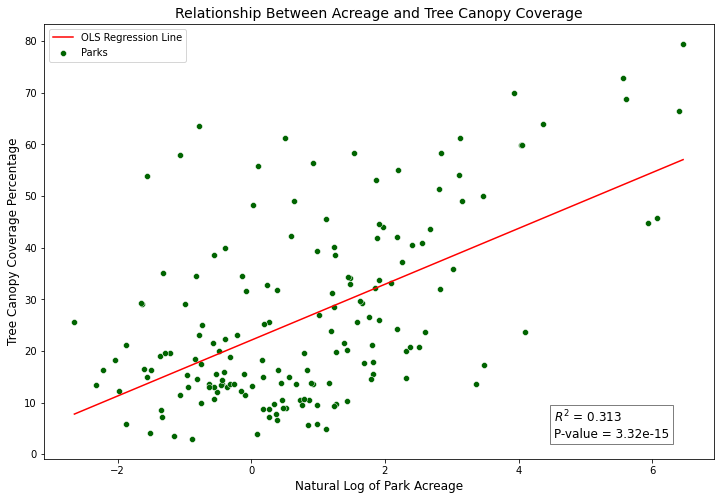

In [75]:
import statsmodels.api as sm


# Now take regression with log transformed acreage
X = tree_reg['log_acres']
Y = tree_reg['Tree_Canopy_Park']

# Add constant to X for intercept
X_with_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(Y, X_with_const)
results = model.fit()


r_squared = results.rsquared
p_value = results.pvalues[1] 

plt.figure(figsize=(12, 8))


sns.scatterplot(x=X, y=Y, label='Parks', color='darkgreen')

# Regression Line
sns.lineplot(x=X, y=results.predict(X_with_const), label='OLS Regression Line', color='red')

plt.text(x=max(X)*0.7, y=min(Y)*1.1,  # Position near the regression line
         s=f"$R^2$ = {r_squared:.3f}\nP-value = {p_value:.3g}", 
         fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))


plt.title("Relationship Between Acreage and Tree Canopy Coverage", fontsize=14)
plt.xlabel("Natural Log of Park Acreage", fontsize=12)
plt.ylabel("Tree Canopy Coverage Percentage", fontsize=12)


plt.legend()

plt.savefig('Acreage_TreeCanopy.jpg', format='jpg')

#plt.savefig('LogAcreage_TreeCanopy.jpg', bbox_inches='tight', dpi=300, format='jpg')

plt.show()



In [76]:
import pandas as pd
import statsmodels.api as sm


#Regression output for non transformed acreage regression

X = tree['acreage']
Y = tree['Tree_Canopy_Park']

X = sm.add_constant(X)

model = sm.OLS(Y, X)  # OLS (Ordinary Least Squares) regression
results = model.fit()


print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       Tree_Canopy_Park   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     41.06
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           1.46e-09
Time:                        21:07:32   Log-Likelihood:                -698.89
No. Observations:                 168   AIC:                             1402.
Df Residuals:                     166   BIC:                             1408.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5149      1.240     19.772      0.0

C:\Users\MaxBo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [77]:
import pandas as pd
import statsmodels.api as sm



# Regression output with log transformed acreage
X = tree_reg['log_acres']
Y = tree_reg['Tree_Canopy_Park']


X = sm.add_constant(X)


model = sm.OLS(Y, X)  # OLS (Ordinary Least Squares) regression
results = model.fit()


print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       Tree_Canopy_Park   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     75.53
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           3.32e-15
Time:                        21:07:33   Log-Likelihood:                -685.96
No. Observations:                 168   AIC:                             1376.
Df Residuals:                     166   BIC:                             1382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0814      1.221     18.079      0.0

C:\Users\MaxBo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


#A 1% increase in park acreage is associated with a .054% increase in tree canopy coverage for a park
#About 31% of variability in the tree canopy coverage is explained by the size of the parks

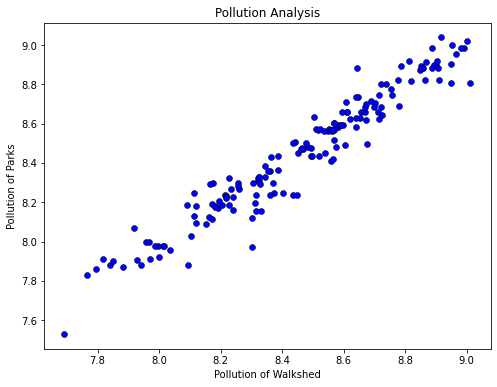

In [78]:
#scatterplot for pollution in parks vs walksheds

plt.figure(figsize=(8, 6))
sns.scatterplot(x=environmental['Pollution_Walkshed'], y=environmental['Pollution_Park'], color='blue', edgecolor='black')


plt.xlabel("Pollution of Walkshed")
plt.ylabel("Pollution of Parks")
plt.title("Pollution Analysis")


plt.show()

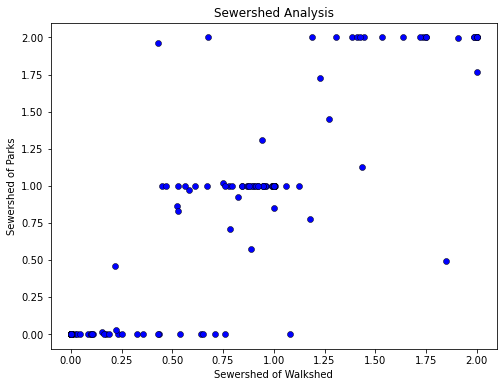

In [79]:
#scatterplot for sewershed in parks vs walksheds

plt.figure(figsize=(8, 6))
sns.scatterplot(x=environmental['Sewershed_Walkshed'], y=environmental['Sewershed_Park'], color='blue', edgecolor='black')


plt.xlabel("Sewershed of Walkshed")
plt.ylabel("Sewershed of Parks")
plt.title("Sewershed Analysis")


plt.show()

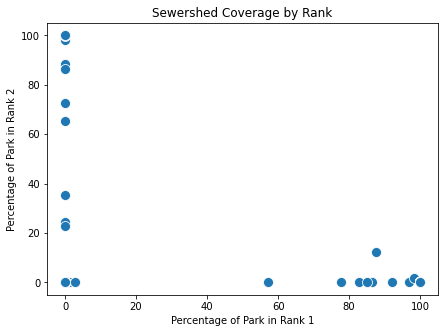

In [80]:
import seaborn as sns

#sewershed scatterplot

plt.figure(figsize=(7, 5))
sns.scatterplot(x=environmental['percent_rank1'], y=environmental['percent_rank2'], s=100)
plt.xlabel("Percentage of Park in Rank 1")
plt.ylabel("Percentage of Park in Rank 2")
plt.title("Sewershed Coverage by Rank")
plt.show()


## Switch Focus to Merging All Datasets

In [81]:
#Merge all datasets

health.rename(columns={'SiteID': 'objectid'}, inplace=True)

environmental_health = environmental.merge(health, on='objectid', how='inner')  # Inner join

In [82]:
#read in crime data

path = 'C:/Users/MaxBo/OneDrive/Documents/Class MQE/Capstone/Data Files/EnvironmentalFinalized'
# Set the working directory to the desired path
os.chdir(path)

crime_parks = pd.read_csv('CrimeInParks.csv')
crime_walksheds = pd.read_csv('CrimeInWalksheds.csv')

In [83]:
#rename id

crime_walksheds.rename(columns={'SiteID': 'objectid'}, inplace=True)

In [84]:
#merge crime in parks

merge3 = environmental_health.merge(crime_parks, on='objectid', how='inner')

In [85]:
#merge crime in walksheds

merge4 = merge3.merge(crime_walksheds, on='objectid', how='inner')

In [86]:
#Rename park name for census merge

merge4.rename(columns={'updatepknm_x': 'updatepknm'}, inplace=True)

In [87]:
#Read in census

census = pd.read_csv('census_data.csv')

In [88]:
census.tail()

,fid,updatepknm,sum_Total,sum_Hispanic.or.Latino,sum_Not.Hispanic.or.Latino,sum_Population.of.one.race,sum_White.alone,sum_Black.or.African.American.alone,sum_American.Indian.and.Alaska.Native.alone,sum_Asian.alone,...,sum_X55.to.59.years_pct,sum_X60.to.64.years_pct,sum_X65.to.69.years_pct,sum_X70.to.74.years_pct,sum_X75.to.79.years_pct,sum_X80.to.84.years_pct,sum_X85.years.and.over_pct,sum_Total.parcels_pct,sum_Vacant_pct,sum_Occupied_pct
163,226,Phillips Park,1440.291429,52.181886,1388.109544,1313.186185,1041.704106,197.555841,4.294960,60.136886,...,6.423840,6.859794,5.827091,6.062944,2.935930,1.582101,1.598617,100,10.370883,89.629117
164,227,Riverview Park,2380.701284,83.032851,2297.668433,2184.127881,1253.569698,891.299885,1.469939,20.833854,...,13.480823,4.399307,6.768188,2.939069,1.633662,1.494924,0.494328,100,12.734977,87.265023
165,228,Schenley Park,17602.118750,603.704916,16998.413840,16351.956960,13122.697820,979.408370,37.877728,2026.261601,...,2.800156,3.195011,3.474924,3.446509,1.651620,1.687593,2.188556,100,9.727394,90.272606
166,229,Southside Park,2801.028605,125.066203,2675.962402,2542.944534,2121.414748,334.190543,0.901723,66.636259,...,5.828730,4.408025,4.031891,2.832329,2.653394,0.857496,1.123070,100,15.039302,84.960698
167,231,Emerald View Combined,6628.231675,212.632999,6415.598676,6129.188470,5187.972740,829.056258,4.467783,78.299333,...,5.228589,6.824745,6.449010,4.983198,2.731166,1.664734,1.675090,100,11.848053,88.151947


In [89]:
#merge census data

parks = merge4.merge(census, on='updatepknm', how='inner')

In [90]:
#Look at all column names to identify undescriptive names

parks.columns

Index(['objectid', 'updatepknm', 'Tree_Canopy_Park', 'Pollution_Park',
       'Sewershed_Park', 'Tree_Canopy_Walkshed', 'Pollution_Walkshed',
       'Sewershed_Walkshed', 'percent_rank1', 'percent_rank2',
       ...
       'sum_X55.to.59.years_pct', 'sum_X60.to.64.years_pct',
       'sum_X65.to.69.years_pct', 'sum_X70.to.74.years_pct',
       'sum_X75.to.79.years_pct', 'sum_X80.to.84.years_pct',
       'sum_X85.years.and.over_pct', 'sum_Total.parcels_pct', 'sum_Vacant_pct',
       'sum_Occupied_pct'],
      dtype='object', length=104)

In [91]:
#Drop extra park name column

parks = parks.drop(columns=['updatepknm_y'])

In [92]:
parks = parks.drop(columns=['SiteName'])

In [93]:
parks = parks.drop(columns=['fid'])

In [94]:
#Rename crime data columns to be more descriptive

parks.rename(columns={'NonViolentCrimeCount_x': 'NonViolentCrimeCount_Parks',
                     'TotalCrimeDensity_x': 'TotalCrimeDensity_Parks',
                     'ViolentCrimeDensity_x': 'ViolentCrimeDensity_Parks',
                     'NonViolentCrimeDensity_x': 'NonViolentCrimeDensity_Parks',
                     'NonViolentCrimeCount_y': 'NonViolentCrimeCount_Walksheds',
                     'TotalCrimeDensity_y': 'TotalCrimeDensity_Walksheds',
                     'ViolentCrimeDensity_y': 'ViolentCrimeDensity_Walksheds',
                     'NonViolentCrimeDensity_y': 'NonViolentCrimeDensity_Walksheds'}, inplace=True)

In [95]:
#rename acreage columns

parks.rename(columns={'Acreage Difference': 'Walkshed Acreage',
                     'acreage':'Park Acreage'},inplace=True)

In [96]:
#view all columns
pd.set_option('display.max_columns', None)
parks.head()


,objectid,updatepknm,Tree_Canopy_Park,Pollution_Park,Sewershed_Park,Tree_Canopy_Walkshed,Pollution_Walkshed,Sewershed_Walkshed,percent_rank1,percent_rank2,total_population_18plus,total_asthma,total_obesity,total_depression,total_diabetes,asthma_rate,obesity_rate,depression_rate,diabetes_rate,Park Acreage,TotalCrimesInParks,ViolentCrimesInParks,NonViolentCrimeCount_Parks,TotalCrimeDensity_Parks,ViolentCrimeDensity_Parks,NonViolentCrimeDensity_Parks,TotalCrimesInWalkshedDifferences,Walkshed Acreage,ViolentCrimeCountsInWalksheds,NonViolentCrimeCount_Walksheds,TotalCrimeDensity_Walksheds,ViolentCrimeDensity_Walksheds,NonViolentCrimeDensity_Walksheds,sum_Total,sum_Hispanic.or.Latino,sum_Not.Hispanic.or.Latino,sum_Population.of.one.race,sum_White.alone,sum_Black.or.African.American.alone,sum_American.Indian.and.Alaska.Native.alone,sum_Asian.alone,sum_Native.Hawaiian.and.Other.Pacific.Islander.alone,sum_Some.Other.Race.alone,sum_Population.of.two.or.more.races,sum_Total.parcels,sum_Occupied,sum_Vacant,sum_Poverty.status.determined.total,sum_Below.poverty.level.,sum_Under.5.years,sum_X5.to.9.years,sum_X10.to.14.years,sum_X15.to.19.years,sum_X20.to.24.years,sum_X25.to.29.years,sum_X30.to.34.years,sum_X35.to.39.years,sum_X40.to.44.years,sum_X45.to.49.years,sum_X50.to.54.years,sum_X55.to.59.years,sum_X60.to.64.years,sum_X65.to.69.years,sum_X70.to.74.years,sum_X75.to.79.years,sum_X80.to.84.years,sum_X85.years.and.over,sum_Total_pct,sum_Hispanic.or.Latino_pct,sum_Not.Hispanic.or.Latino_pct,sum_Population.of.one.race_pct,sum_White.alone_pct,sum_Black.or.African.American.alone_pct,sum_American.Indian.and.Alaska.Native.alone_pct,sum_Asian.alone_pct,sum_Native.Hawaiian.and.Other.Pacific.Islander.alone_pct,sum_Some.Other.Race.alone_pct,sum_Population.of.two.or.more.races_pct,sum_Poverty.status.determined.total_pct,sum_Below.poverty.level._pct,sum_Under.5.years_pct,sum_X5.to.9.years_pct,sum_X10.to.14.years_pct,sum_X15.to.19.years_pct,sum_X20.to.24.years_pct,sum_X25.to.29.years_pct,sum_X30.to.34.years_pct,sum_X35.to.39.years_pct,sum_X40.to.44.years_pct,sum_X45.to.49.years_pct,sum_X50.to.54.years_pct,sum_X55.to.59.years_pct,sum_X60.to.64.years_pct,sum_X65.to.69.years_pct,sum_X70.to.74.years_pct,sum_X75.to.79.years_pct,sum_X80.to.84.years_pct,sum_X85.years.and.over_pct,sum_Total.parcels_pct,sum_Vacant_pct,sum_Occupied_pct
0,1,Able Long Park,61.285714,8.184690,0.000,34.684211,8.227677,0.000,0.000000,0.0,954,102.00,309.00,228.00,101.00,0.106918,0.323899,0.238994,0.105870,1.659517,1,1,0,0.602585,0.602585,0.000000,1186,131.748726,258,928,9.001985,1.958273,7.043711,1146.727732,101.959436,1044.768296,982.777606,825.933755,117.599699,0.690961,30.941246,0.210866,7.401079,61.990690,1764.924616,1594.442064,170.482552,1067.217265,82.293861,36.957215,51.965317,45.663669,39.020286,39.086494,123.588125,96.826587,68.745584,91.691283,63.681050,53.856556,82.138491,70.225689,60.893578,49.260161,35.841584,12.439858,47.870035,100,8.891338,91.108662,85.702785,72.025271,10.255242,0.060255,2.698221,0.018389,0.645409,5.405877,93.066317,7.176408,3.222841,4.531618,3.982085,3.402751,3.408524,10.777460,8.443729,5.994935,7.995907,5.553284,4.696543,7.162859,6.124007,5.310204,4.295716,3.125553,1.084814,4.174490,100,9.659481,90.340519
1,2,Albert Turk Graham Park,15.333333,8.299664,0.000,15.025678,8.257231,0.000,0.000000,0.0,2287,285.00,765.00,592.00,246.00,0.124617,0.334499,0.258854,0.107564,0.381545,1,0,1,2.620920,0.000000,2.620920,5164,156.234907,880,4284,33.052793,5.632544,27.420249,951.864209,64.491788,887.372421,861.769948,656.449997,166.915820,7.489890,28.230621,0.015131,2.668489,25.602473,391.694036,324.524362,67.169674,206.240940,77.358639,7.099286,1.170553,10.990853,520.543985,388.540763,13.975547,34.475389,12.656350,24.606757,5.422494,6.064664,11.682373,7.897115,8.350981,5.671987,6.226830,0.687457,0.970584,100,6.775314,93.224686,90.534967,68.964669,17.535676,0.786865,2.965824,0.001590,0.280343,2.689719,21.667055,8.127067,0.745830,0.122975,1.154666,54.686790,40.818928,1.

In [97]:
#Check length

len(parks)

168

In [98]:
#Reset
pd.set_option('display.max_columns', 8)

In [99]:
#Write to CSV

#parks.to_csv('Parks_Master.csv', index=False)

## Now back to visualizations

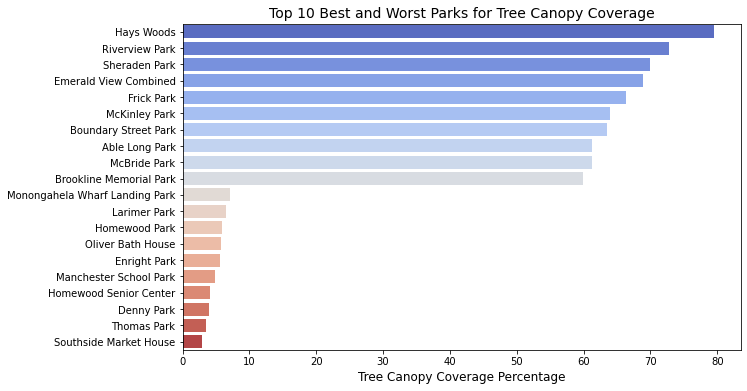

In [100]:
#Top ten and worst ten tree canopy bar plot


environmental_sort = environmental.sort_values(by='Tree_Canopy_Park', ascending=False)


df_selected = pd.concat([environmental_sort.head(10), environmental_sort.tail(10)])


plt.figure(figsize=(10, 6))
sns.barplot(x='Tree_Canopy_Park', y='updatepknm', data=df_selected, palette='coolwarm')


plt.title('Top 10 Best and Worst Parks for Tree Canopy Coverage', fontsize=14)
plt.xlabel('Tree Canopy Coverage Percentage', fontsize=12)
plt.ylabel(None)

#plt.savefig('Top10Bottom10_Tree.jpg',bbox_inches='tight', dpi=300, format='jpg')


plt.show()

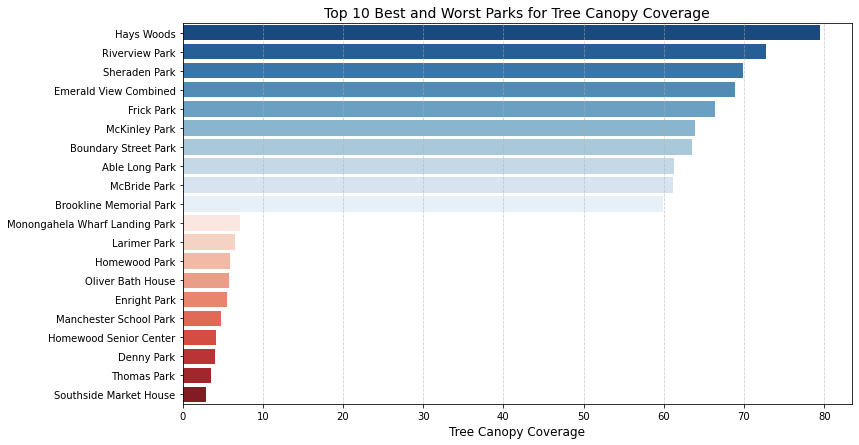

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Again but with two different gradients

environmental_sort = environmental.sort_values(by='Tree_Canopy_Park', ascending=False)


top_10 = environmental_sort.head(10)
bottom_10 = environmental_sort.tail(10)


top_colors = sns.color_palette("Blues_r", len(top_10))  # Gradient Blue for top 10
bottom_colors = sns.color_palette("Reds", len(bottom_10))  # Gradient Red for bottom 10


df_selected = pd.concat([bottom_10, top_10])  # Ensure bottom parks appear first
colors = top_colors +bottom_colors   # Match color order


df_selected = df_selected.sort_values(by='Tree_Canopy_Park', ascending=False)


plt.figure(figsize=(12, 7))
sns.barplot(
    x='Tree_Canopy_Park', 
    y='updatepknm', 
    data=df_selected, 
    palette=colors  
)


plt.title('Top 10 Best and Worst Parks for Tree Canopy Coverage', fontsize=14)
plt.xlabel('Tree Canopy Coverage', fontsize=12)
plt.ylabel(None)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines for better readability


# plt.savefig('Top10Bottom10_Tree.jpg', bbox_inches='tight', dpi=300, format='jpg')


plt.show()


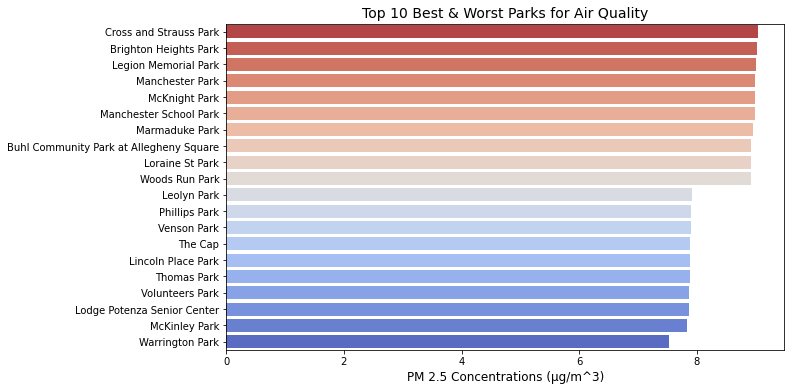

In [102]:
#Bar plot for top ten worst and best pollution

environmental_sort = environmental.sort_values(by='Pollution_Park', ascending=False)


df_selected = pd.concat([environmental_sort.head(10), environmental_sort.tail(10)])


plt.figure(figsize=(10, 6))
sns.barplot(x='Pollution_Park', y='updatepknm', data=df_selected, palette='coolwarm_r')


plt.title('Top 10 Best & Worst Parks for Air Quality', fontsize=14)
plt.xlabel('PM 2.5 Concentrations (μg/m^3)', fontsize=12)
plt.ylabel(None)

#plt.savefig('Top10Bottom10_Pollution.jpg',bbox_inches='tight', dpi=300, format='jpg')




plt.show()

In [103]:
#view all sewershed ratings above 1.33

pd.set_option('display.max_columns', None)

environmental.sort_values(by='Sewershed_Park',ascending=False).head(24)

,objectid,updatepknm,Tree_Canopy_Park,Pollution_Park,Sewershed_Park,Tree_Canopy_Walkshed,Pollution_Walkshed,Sewershed_Walkshed,percent_rank1,percent_rank2
146,211,Tuxedo Street Skate Park,25.200000,8.568208,2.000,31.522222,8.570422,2.000,0.0,100.000000
15,23,Paul J. Sciullo II Memorial Park,26.480000,8.574891,2.000,13.512247,8.509964,1.735,0.0,100.000000
38,51,Duncan Park,23.000000,8.478654,2.000,24.501089,8.574375,2.000,0.0,100.000000
34,47,Denny Park,4.000000,8.894416,2.000,7.057206,8.785575,1.384,0.0,100.000000
75,105,Lewis Park,15.500000,8.362094,2.000,22.149852,8.386662,1.443,0.0,100.000000
47,63,Fifty-Seventh Street Park,10.400000,8.473692,2.000,29.157044,8.494914,1.987,0.0,100.000000
74,104,Leslie Park,14.518519,8.661080,2.000,12.026030,8.712706,1.639,0.0,100.000000
49,66,Fort Pitt Park,37.162791,8.236525,2.000,26.260870,8.315675,1.751,0.0,100.000000
26,37,Cobden Street Park,34.600000,8.322573,2.000,27.669377,8.228387,1.186,0.0,100.000000
97,133,Mutual Park,11.500000,8.568208,2.000,27.184433,8.558275,1.308,0.0,100.000000


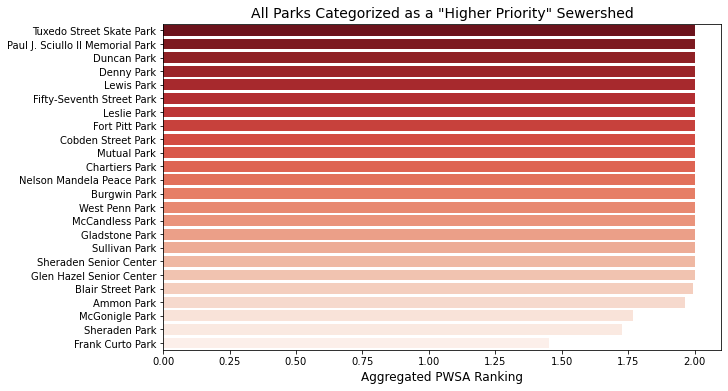

In [104]:
environmental_sort = environmental.sort_values(by='Sewershed_Park', ascending=False)

# Select bottom 10 and top 10
df_selected = pd.concat([environmental_sort.head(24)])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sewershed_Park', y='updatepknm', data=df_selected, palette='Reds_r')

# Titles and labels
plt.title('All Parks Categorized as a "Higher Priority" Sewershed', fontsize=14)
plt.xlabel('Aggregated PWSA Ranking', fontsize=12)
plt.ylabel(None)


#plt.savefig('Sewer_Above_1.jpg',bbox_inches='tight', dpi=300, format='jpg')


# Show the plot
plt.show()


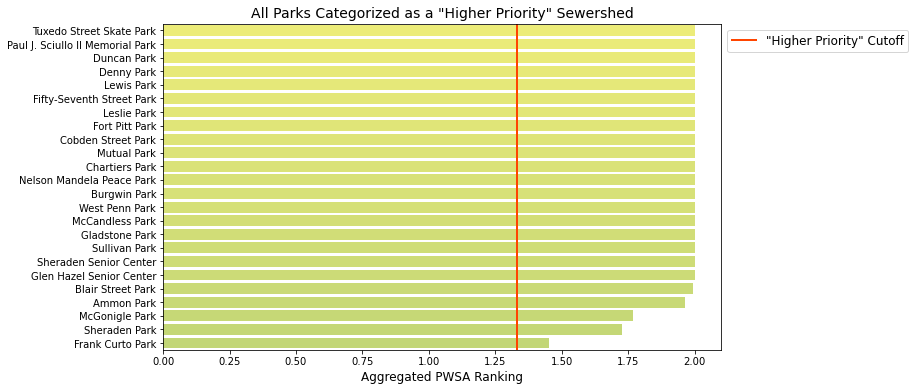

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

#make bar plot for 24 sewershed parks above 1.33

# Truncate Reds_r to use only the deeper red portion (e.g., 0.3 to 1.0)
def truncate_colormap(cmap, minval=0, maxval=.5, n=100):
    new_cmap = LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap


truncated_reds_r = truncate_colormap(plt.get_cmap('summer_r'), 0, .2)

# Sort and select top 24
environmental_sort = environmental.sort_values(by='Sewershed_Park', ascending=False)
df_selected = environmental_sort.head(24)


plt.figure(figsize=(10, 6))
sns.barplot(
    x='Sewershed_Park', 
    y='updatepknm', 
    data=df_selected, 
    palette=truncated_reds_r(np.linspace(0, 1, len(df_selected)))
)

#priority cutoff line
plt.axvline(1.33, color='orangered', linestyle='solid', linewidth=2, label='"Higher Priority" Cutoff')


plt.title('All Parks Categorized as a "Higher Priority" Sewershed', fontsize=14)
plt.xlabel('Aggregated PWSA Ranking', fontsize=12)
plt.ylabel(None)
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc='upper left')

#plt.savefig('Sewer_Higher_Priority.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()


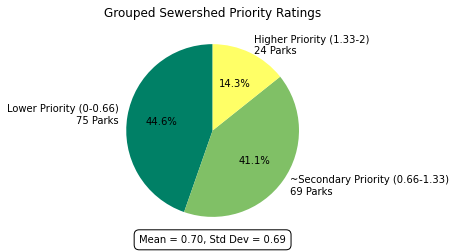

In [106]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Create cool pie chart for sewershed data

bins = [0, 0.66, 1.33, 2]
labels = ['Lower Priority (0-0.66)', '~Secondary Priority (0.66-1.33)', 'Higher Priority (1.33-2)']


binned = pd.cut(environmental['Sewershed_Park'], bins=bins, labels=labels, include_lowest=True)


counts = binned.value_counts().sort_index()


cmap = cm.get_cmap('summer')
colors = cmap(np.linspace(0, 1, len(counts)))


mean_val = environmental['Sewershed_Park'].mean()
std_val = environmental['Sewershed_Park'].std()

custom_labels = [f"{label}\n{count} Parks" for label, count in zip(counts.index, counts)]

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    counts, 
    labels=custom_labels, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90
)

legend_text = f"Mean = {mean_val:.2f}, Std Dev = {std_val:.2f}"
plt.text(0, -1.3, legend_text, ha='center', fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title('Grouped Sewershed Priority Ratings')
plt.tight_layout()

#plt.savefig('SewershedPieRatings.jpg',bbox_inches='tight', dpi=300, format='jpg')

plt.show()


In [107]:
#Add in acreage to environmetal df

environmental_acreage = environmental.merge(acreage, on="objectid")

In [108]:
environmental_acreage.sort_values(by='acreage',ascending=False).head(55)

,objectid,updatepknm,Tree_Canopy_Park,Pollution_Park,Sewershed_Park,Tree_Canopy_Walkshed,Pollution_Walkshed,Sewershed_Walkshed,percent_rank1,percent_rank2,acreage
160,300013,Hays Woods,79.505395,8.428509,0.000,56.450567,8.363410,0.000,0.000000,0.000000,639.998324
52,71,Frick Park,66.375506,8.488852,0.001,24.795508,8.604663,0.230,0.102817,0.000000,605.859151
112,164,Schenley Park,45.698152,8.160658,1.000,19.071935,8.240077,0.999,100.000000,0.000000,434.082623
62,89,Highland Park,44.806319,8.508928,0.571,30.905066,8.441584,0.888,57.067676,0.000000,377.910577
167,2100,Emerald View Combined,68.819079,8.067114,0.458,24.449708,7.917866,0.216,0.000000,22.885379,270.365828
109,160,Riverview Park,72.762976,8.803274,1.000,36.276082,8.720347,0.900,100.000000,0.000000,258.604289
89,122,McKinley Park,63.912676,7.830583,0.000,28.206003,7.764342,0.000,0.000000,0.000000,78.528351
40,53,Allegheny Commons,23.619926,8.905841,0.829,10.419689,8.949288,0.530,82.900298,0.000000,59.939954
117,170,Southside Park,59.841699,8.128119,1.000,21.367905,8.111917,0.793,100.000000,0.000000,57.475858
19,28,Brookline Memorial Park,59.948819,8.092884,0.000,23.361345,8.118729,0.000,0.000000,0.000000,56.235114


In [109]:
environmental_acreage['percent_rank1'].describe()

count    168.000000
mean      39.689318
std       48.412886
min        0.000000
25%        0.000000
50%        0.000000
75%      100.000000
max      100.000000
Name: percent_rank1, dtype: float64

In [110]:
#Import filtered park dataset to extract categories for tree canopy park category analysis

path = 'C:/Users/MaxBo/OneDrive/Documents/Class MQE/Capstone/Data Files/Filtered Park Data Finalized'

os.chdir(path)

park_cat = pd.read_csv("filtered park.csv")

In [111]:
#extract id and category

park_cat = park_cat[['objectid','final_cat']]


In [112]:
#merge category into main environmental dataframe

environmental = environmental.merge(park_cat, on="objectid")

In [113]:
environmental['final_cat'].value_counts()

Neighborhood Park      109
Community Park          22
Special Use Park        13
Riverfront Park          9
Regional Park            5
Beautification Site      5
New Park                 3
Other                    1
Parklet                  1
Name: final_cat, dtype: int64

In [114]:
#Only keep neighborhood parks

environmental_neighborhood = environmental[environmental['final_cat']=='Neighborhood Park']

In [115]:
#only keep community parks

environmental_community  = environmental[environmental['final_cat']=='Community Park']

In [116]:
#Exclude parks specifically limited to sports fields manually

sports_neighborhood_parks = ['Homewood Park','Manchester School Park']

# Exclude the observations
environmental_neighborhood = environmental_neighborhood[~environmental_neighborhood['updatepknm'].isin(sports_neighborhood_parks)]



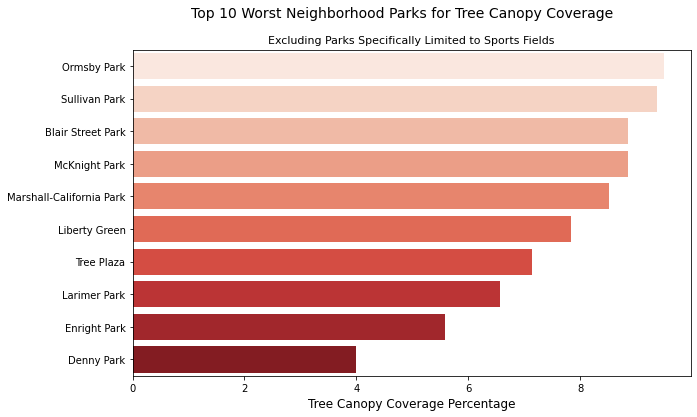

In [117]:
#Bar plot specifically for neighborhood parks

environmental_sort = environmental_neighborhood.sort_values(by='Tree_Canopy_Park', ascending=False)

df_selected = environmental_sort.tail(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Tree_Canopy_Park', y='updatepknm', data=df_selected, palette='Reds')

plt.suptitle("Top 10 Worst Neighborhood Parks for Tree Canopy Coverage",fontsize=14)
plt.title('Excluding Parks Specifically Limited to Sports Fields', fontsize=11)
plt.xlabel('Tree Canopy Coverage Percentage', fontsize=12)
plt.ylabel(None)

#plt.savefig('WorstNeighborhoodParks.jpg',bbox_inches='tight', dpi=300, format='jpg')




plt.show()

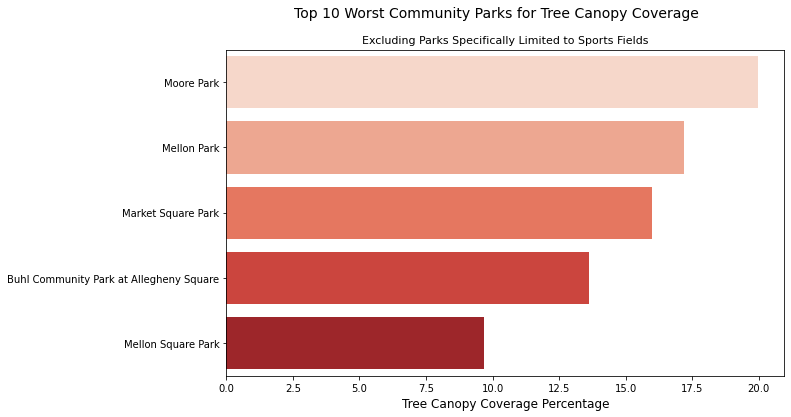

In [118]:
#Bar plot for specifically community parks

environmental_sort = environmental_community.sort_values(by='Tree_Canopy_Park', ascending=False)

df_selected = environmental_sort.tail(5)


plt.figure(figsize=(10, 6))
sns.barplot(x='Tree_Canopy_Park', y='updatepknm', data=df_selected, palette='Reds')


plt.suptitle("Top 10 Worst Community Parks for Tree Canopy Coverage",fontsize=14)
plt.title('Excluding Parks Specifically Limited to Sports Fields', fontsize=11)
plt.xlabel('Tree Canopy Coverage Percentage', fontsize=12)
plt.ylabel(None)

#plt.savefig('Bottom5CommunityParks.jpg',bbox_inches='tight', dpi=300, format='jpg')



plt.show()

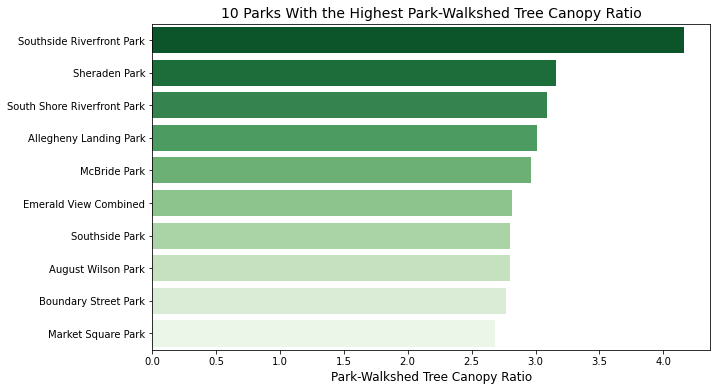

In [119]:
#Best tree canopy ratios bar plot

tree_high_sort = tree_high.sort_values(by='tree_ratio', ascending=False)

df_selected = tree_high_sort.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='tree_ratio', y='updatepknm', data=df_selected, palette='Greens_r')


plt.title('10 Parks With the Highest Park-Walkshed Tree Canopy Ratio', fontsize=14)
plt.xlabel('Park-Walkshed Tree Canopy Ratio', fontsize=12)
plt.ylabel(None)

#plt.savefig('10BestTreeRatio.jpg',bbox_inches='tight', dpi=300, format='jpg')



plt.show()

In [120]:
#Only relevant parks for ratio bar graphs for low performing parks
#This was why we went to google earth a while ago

tree3 = tree2[tree2['include']==1]

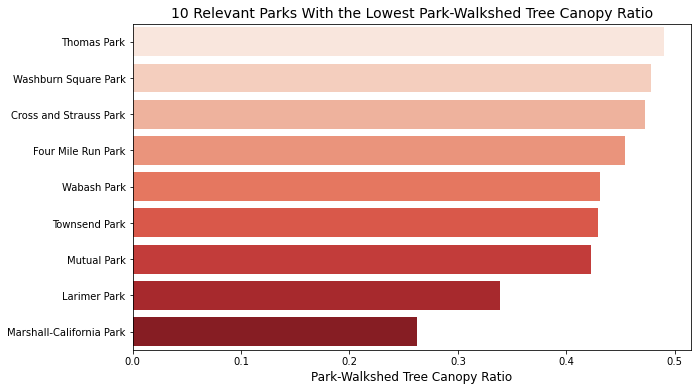

In [121]:
#Bar graph for bottom tree canopy ratios 

tree3 = tree3.sort_values(by='tree_ratio', ascending=False)

df_selected = tree3.tail(9)


plt.figure(figsize=(10, 6))
sns.barplot(x='tree_ratio', y='updatepknm', data=df_selected, palette='Reds')



plt.title('10 Relevant Parks With the Lowest Park-Walkshed Tree Canopy Ratio', fontsize=14)
plt.xlabel('Park-Walkshed Tree Canopy Ratio', fontsize=12)
plt.ylabel(None)

#plt.savefig('9WorstTreeRatio.jpg',bbox_inches='tight', dpi=300, format='jpg')



plt.show()